In [4]:
# Imports
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score

Task 1 - Part 1

**Titanic Dataset Preprocessing**

In [5]:
# Initializing
label_encoder = LabelEncoder()

In [6]:
train_df = pd.read_csv('/content/drive/MyDrive/CSE572 Data Mining/HW2/titanic_dataset/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/CSE572 Data Mining/HW2/titanic_dataset/test.csv')

In [7]:
train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
train_df.shape

(891, 12)

<Axes: >

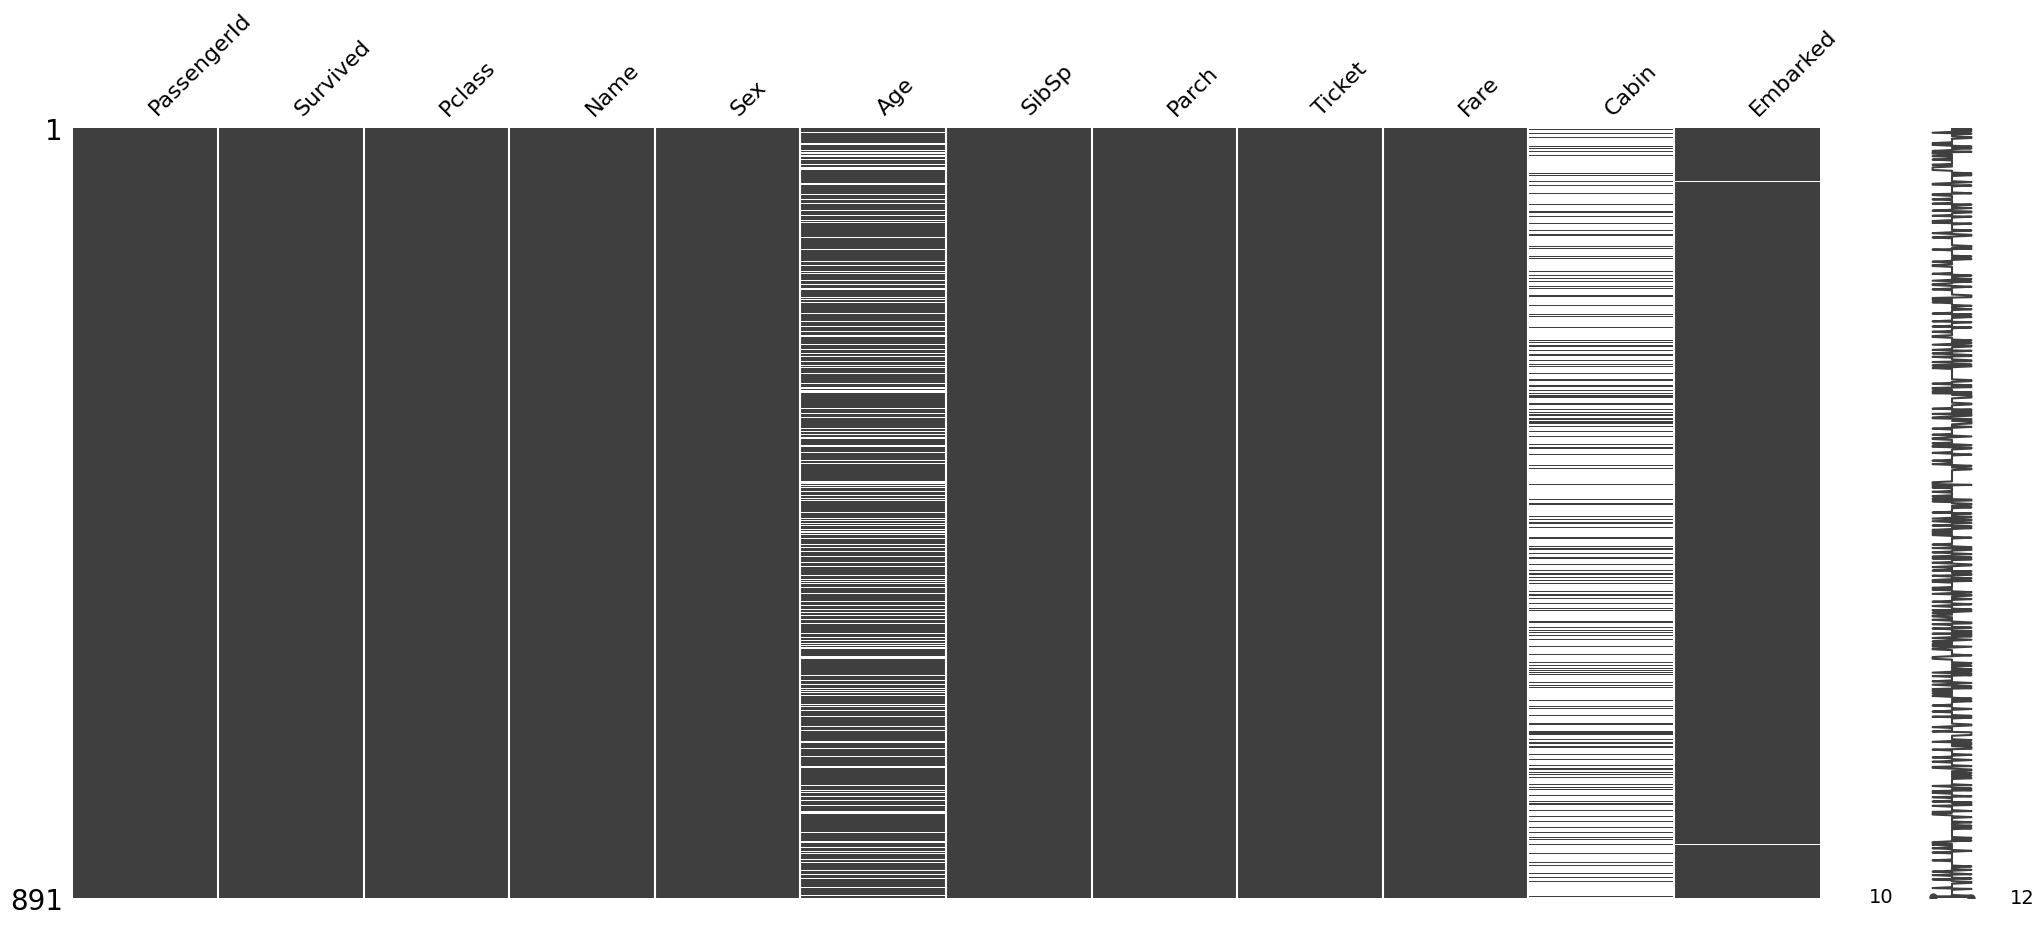

In [10]:
msno.matrix(train_df)

<Axes: >

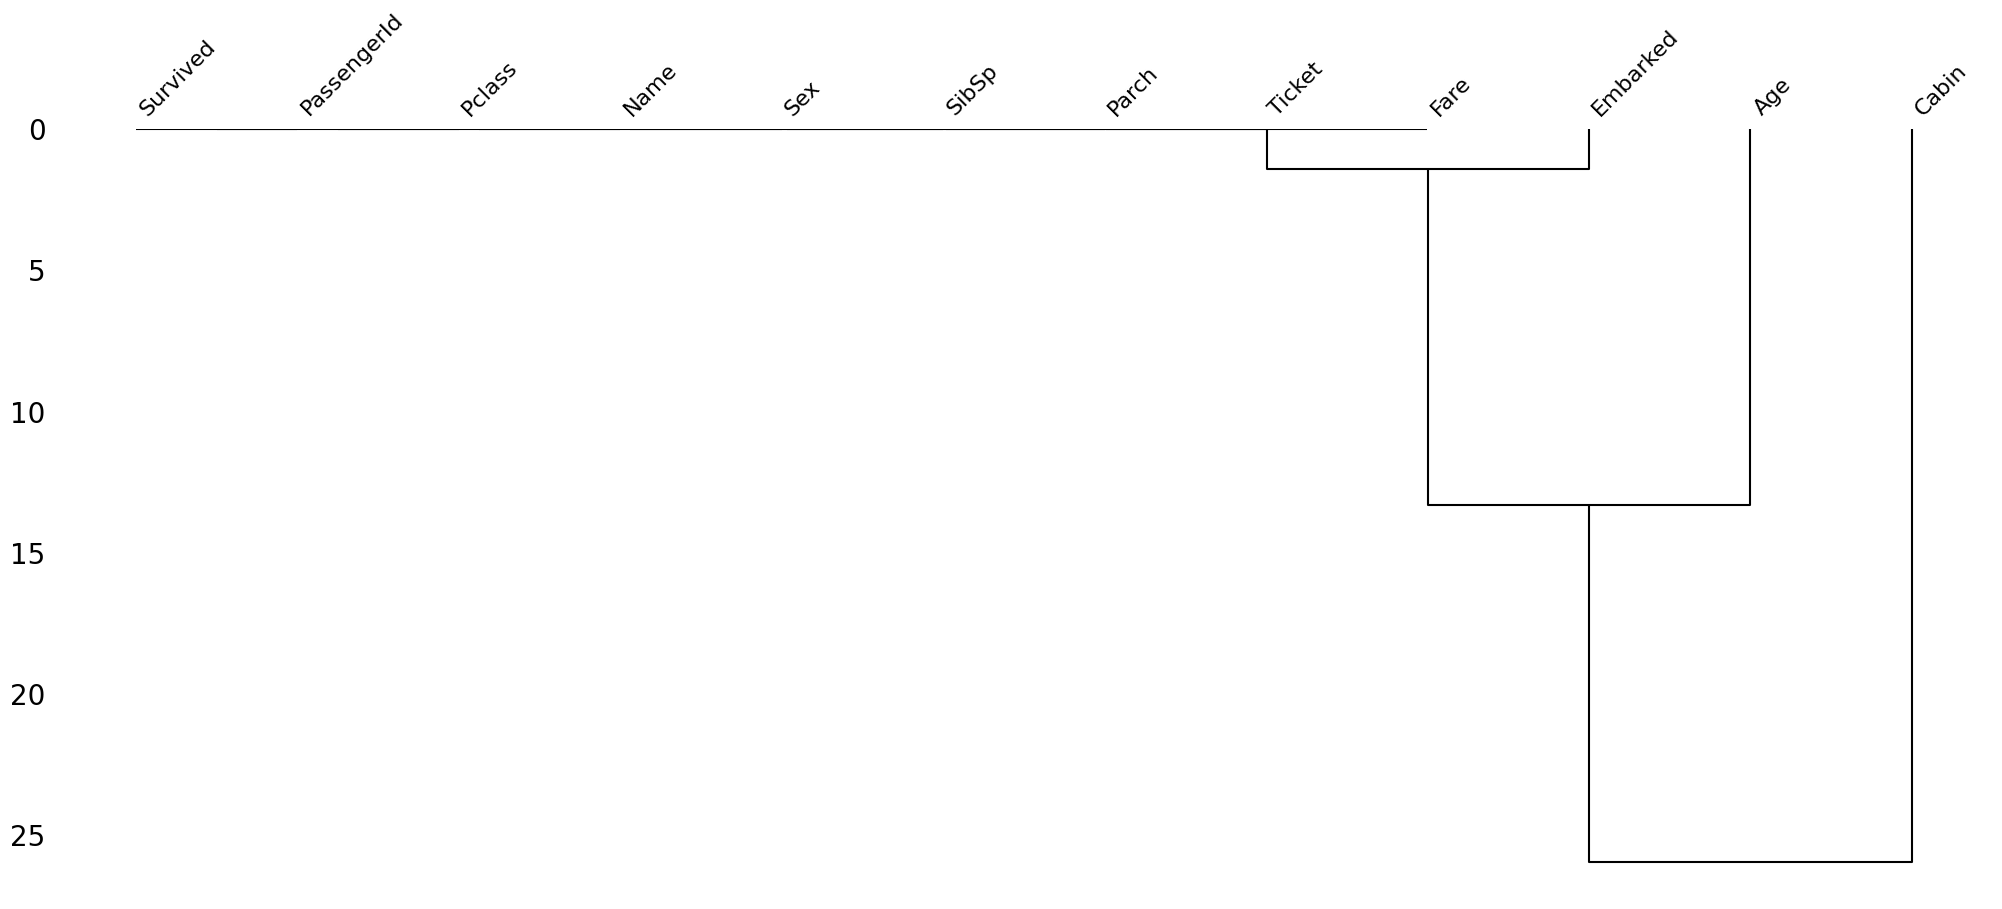

In [11]:
msno.dendrogram(train_df)
# Graph implies that missing values are

From the two missingno plots above, we see no pattern in the missing data in the two columns age and cabin

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
# Fill missing values for Age column
# Function to fill missing age values based on mode for each PClass and Sex group
def fill_age_mode(group):
    mode_age = group['Age'].mode()
    # If mode exists, fill NaN with mode. Otherwise, don't fill.
    if not mode_age.empty:
        group['Age'].fillna(mode_age[0], inplace=True)
    return group

# Group by PClass and Sex, then apply the fill function
train_df = train_df.groupby(['Sex', 'Pclass']).apply(fill_age_mode)
train_df.reset_index(drop=True, inplace=True)

<ipython-input-13-f0dc5f7699f0>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  group['Age'].fillna(mode_age[0], inplace=True)
<ipython-input-13-f0dc5f7699f0>:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  train_df = train_df.groupby

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
# prompt: convert age to age_band

def convert_age_to_age_band(age):
  if age <= 6:  # Good split
    return 0  # Toddler
  elif age <= 16:
    return 1  # Child
  elif age <= 30:
    return 2  # Young Adult
  elif age <= 50:
    return 3  # 'Middle Aged'
  else:
    return 4  # 'Senior'

# Apply the function to the 'Age' column and create a new column 'AgeBand'
train_df['AgeBand'] = train_df['Age'].apply(convert_age_to_age_band)

# You can now use the 'AgeBand' column for analysis.
# For example, you can group by 'AgeBand' and calculate the survival rate:
survival_by_age_band = train_df.groupby('AgeBand')['Survived'].mean().sort_values(ascending=False)
print(survival_by_age_band)

AgeBand
0    0.702128
3    0.428044
1    0.415094
4    0.343750
2    0.326754
Name: Survived, dtype: float64


Understanding features in the train_df.

Credits: https://towardsdatascience.com/a-beginners-guide-to-kaggle-s-titanic-problem-3193cb56f6ca

1. Pclass - passenger division - class 1,2,3

2. SibSp - number of siblings or spouse of the person onboard

3. Parch - number of parents or children each passenger was touring with

4. Embarked - where the travelled onboarded the ship

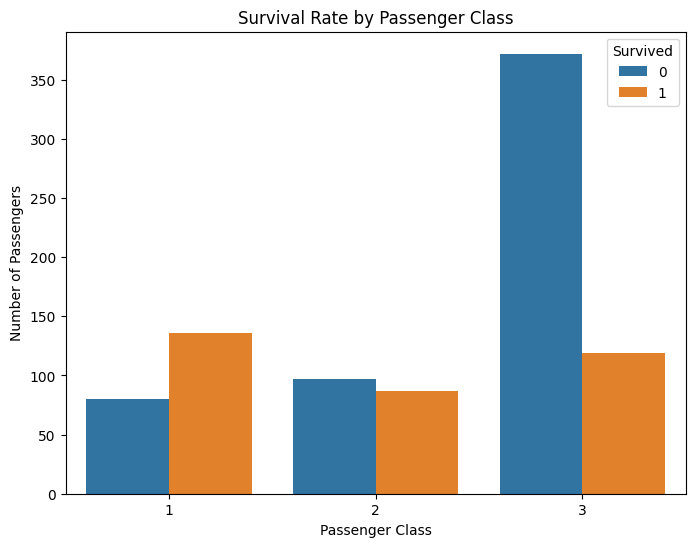

In [16]:
# prompt: plot type of PClass vs survived

plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.show()

In [17]:
train_df.head(0)

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked, AgeBand]
Index: []

In [18]:
# prompt: what ratio of passengers from each class survived?

survival_by_class = train_df.groupby('Pclass')['Survived'].mean()
print(survival_by_class)

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


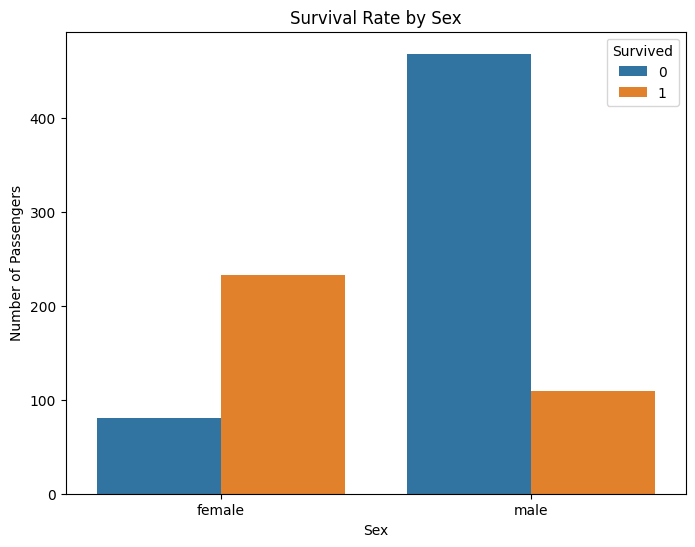

In [19]:
# prompt: plot Sex vs Survived

plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=train_df)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Number of Passengers')
plt.show()

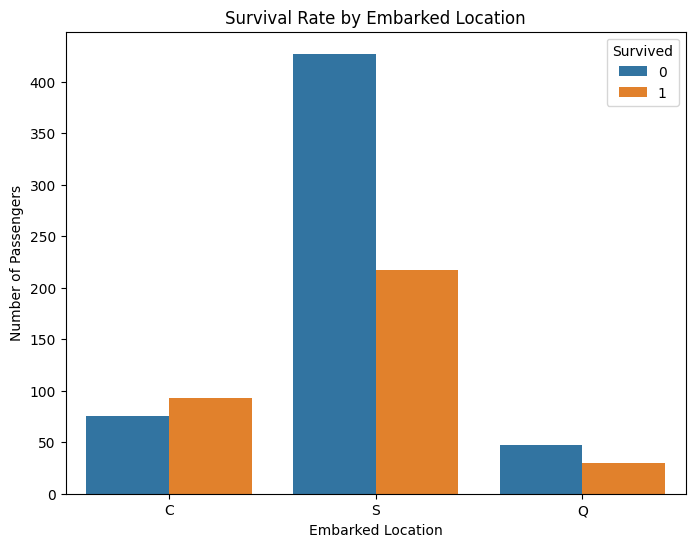

In [20]:
# prompt: plot Embarked vs Survived

plt.figure(figsize=(8, 6))
sns.countplot(x='Embarked', hue='Survived', data=train_df)
plt.title('Survival Rate by Embarked Location')
plt.xlabel('Embarked Location')
plt.ylabel('Number of Passengers')
plt.show()

In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  AgeBand      891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


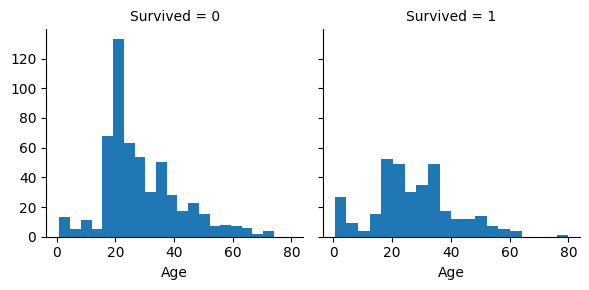

In [22]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

In [23]:
# prompt: encode Sex into 0 for female and 1 for male

# Encode Sex into 0 for female and 1 for male
train_df['Sex'] = label_encoder.fit_transform(train_df['Sex'])
train_df.Sex.value_counts()

Sex
1    577
0    314
Name: count, dtype: int64

In [24]:
# prompt: drop rows where Embarked is missing

# Drop rows where 'Embarked' is missing
train_df.dropna(subset=['Embarked'], inplace=True)

In [25]:
# prompt: encode Embarked into numerical data

# Encode Embarked into 0 for C, 1 for Q, 2 for S
train_df['Embarked'] = label_encoder.fit_transform(train_df['Embarked'])
train_df.Embarked.value_counts()

Embarked
2    644
0    168
1     77
Name: count, dtype: int64

In [26]:
# prompt: drop Age, Ticket, Cabin columns

train_df.drop(['PassengerId', 'Age', 'Ticket', 'Cabin'], axis=1, inplace=True)

train_df.sample(5)

Survived  Pclass                                     Name  Sex  SibSp  \
121         1       2                Smith, Miss. Marion Elsie    0      0   
305         1       3  Yasbeck, Mrs. Antoni (Selini Alexander)    0      1   
257         1       3                 Hirvonen, Miss. Hildur E    0      0   
513         0       2              Butler, Mr. Reginald Fenton    1      0   
617         0       3            Lefebre, Master. Henry Forbes    1      3   

     Parch     Fare  Embarked  AgeBand  
121      0  13.0000         2        3  
305      0  14.4542         0        1  
257      1  12.2875         2        0  
513      0  13.0000         2        2  
617      1  25.4667         2        2

In [27]:
# Credits: https://www.kaggle.com/code/startupsci/titanic-data-science-solutions

train_df['Title'] = train_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex         0    1
Title             
Capt        0    1
Col         0    2
Countess    1    0
Don         0    1
Dr          1    6
Jonkheer    0    1
Lady        1    0
Major       0    2
Master      0   40
Miss      181    0
Mlle        2    0
Mme         1    0
Mr          0  517
Mrs       124    0
Ms          1    0
Rev         0    6
Sir         0    1

In [28]:
train_df['Title'] = train_df['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train_df['Title'] = train_df['Title'].replace('Mlle', 'Miss')
train_df['Title'] = train_df['Title'].replace('Ms', 'Miss')
train_df['Title'] = train_df['Title'].replace('Mme', 'Mrs')

train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

Title  Survived
0  Master  0.575000
1    Miss  0.701087
2      Mr  0.156673
3     Mrs  0.792000
4    Rare  0.347826

In [29]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

train_df['Title'] = train_df['Title'].map(title_mapping)
train_df['Title'] = train_df['Title'].fillna(0)

train_df.head()

Survived  Pclass                                               Name  Sex  \
0         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0   
1         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0   
2         1       1                           Bonnell, Miss. Elizabeth    0   
3         1       1     Spencer, Mrs. William Augustus (Marie Eugenie)    0   
4         1       1           Harper, Mrs. Henry Sleeper (Myna Haxtun)    0   

   SibSp  Parch      Fare  Embarked  AgeBand  Title  
0      1      0   71.2833         0        3      3  
1      1      0   53.1000         2        3      3  
2      0      0   26.5500         2        4      2  
3      1      0  146.5208         0        3      3  
4      1      0   76.7292         0        3      3

In [30]:
train_df.drop(['Name'], axis=1,inplace=True)

train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   Embarked  889 non-null    int64  
 7   AgeBand   889 non-null    int64  
 8   Title     889 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 69.5 KB


In [31]:
train_df.head()

Survived  Pclass  Sex  SibSp  Parch      Fare  Embarked  AgeBand  Title
0         1       1    0      1      0   71.2833         0        3      3
1         1       1    0      1      0   53.1000         2        3      3
2         1       1    0      0      0   26.5500         2        4      2
3         1       1    0      1      0  146.5208         0        3      3
4         1       1    0      1      0   76.7292         0        3      3

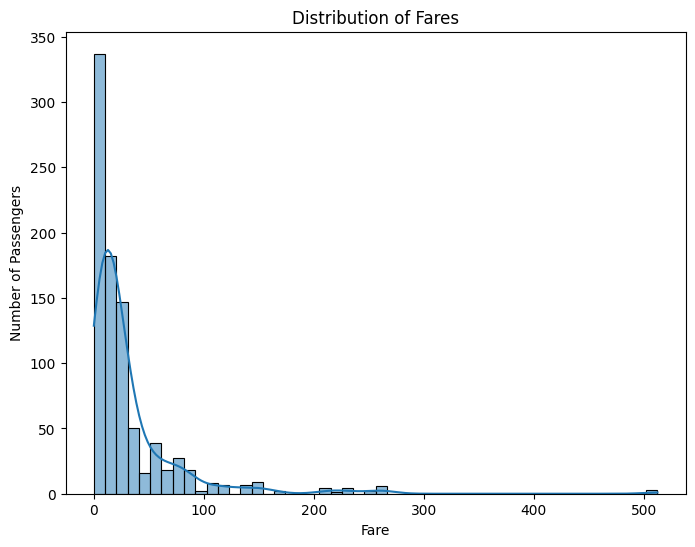

In [32]:
# prompt: plot values in fares

plt.figure(figsize=(8, 6))
sns.histplot(train_df['Fare'], bins=50, kde=True)
plt.title('Distribution of Fares')
plt.xlabel('Fare')
plt.ylabel('Number of Passengers')
plt.show()

In [33]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

<ipython-input-33-95f0d99ce732>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)


FareBand  Survived
0  (-0.001, 7.896]  0.197309
1  (7.896, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.577273

In [34]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

<ipython-input-34-e290e000cf8e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)


PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [35]:
train_df.loc[train_df['Fare'] <= 7.91, 'Fare'] = 0
train_df.loc[(train_df['Fare'] > 7.91) & (train_df['Fare'] <= 14.454), 'Fare'] = 1
train_df.loc[(train_df['Fare'] > 14.454) & (train_df['Fare'] <= 31), 'Fare']   = 2
train_df.loc[train_df['Fare'] > 31, 'Fare'] = 3
train_df['Fare'] = train_df['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)

In [36]:
train_df.head()

Survived  Pclass  Sex  SibSp  Parch  Fare  Embarked  AgeBand  Title
0         1       1    0      1      0     3         0        3      3
1         1       1    0      1      0     3         2        3      3
2         1       1    0      0      0     2         2        4      2
3         1       1    0      1      0     3         0        3      3
4         1       1    0      1      0     3         0        3      3

In [37]:
test_df.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

Task 1 - Part 2

**Learn and fine-tune a decision tree model with the Titanic training data, plot your decision tree**

In [38]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred,pos_label=1.0)

  try:
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred_proba)
  except AttributeError:
    auc = "Not applicable for this model"

  return accuracy, recall, auc

In [39]:
# Define features (X) and target (y)
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Decision Tree:
Accuracy: 0.797752808988764
Recall: 0.7083333333333334
AUC: 0.7904219077568133
----------------------------------------------------------------------------------------------------
Train Accuracy : 0.9029535864978903
Train Confusion Matrix:
[[426  17]
 [ 52 216]]
--------------------------------------------------
Test Accuracy : 0.797752808988764
Test Confusion Matrix:
[[91 15]
 [21 51]]
----------------------------------------------------------------------------------------------------
DECISION TREE WITHOUT PARAMETER TUNING


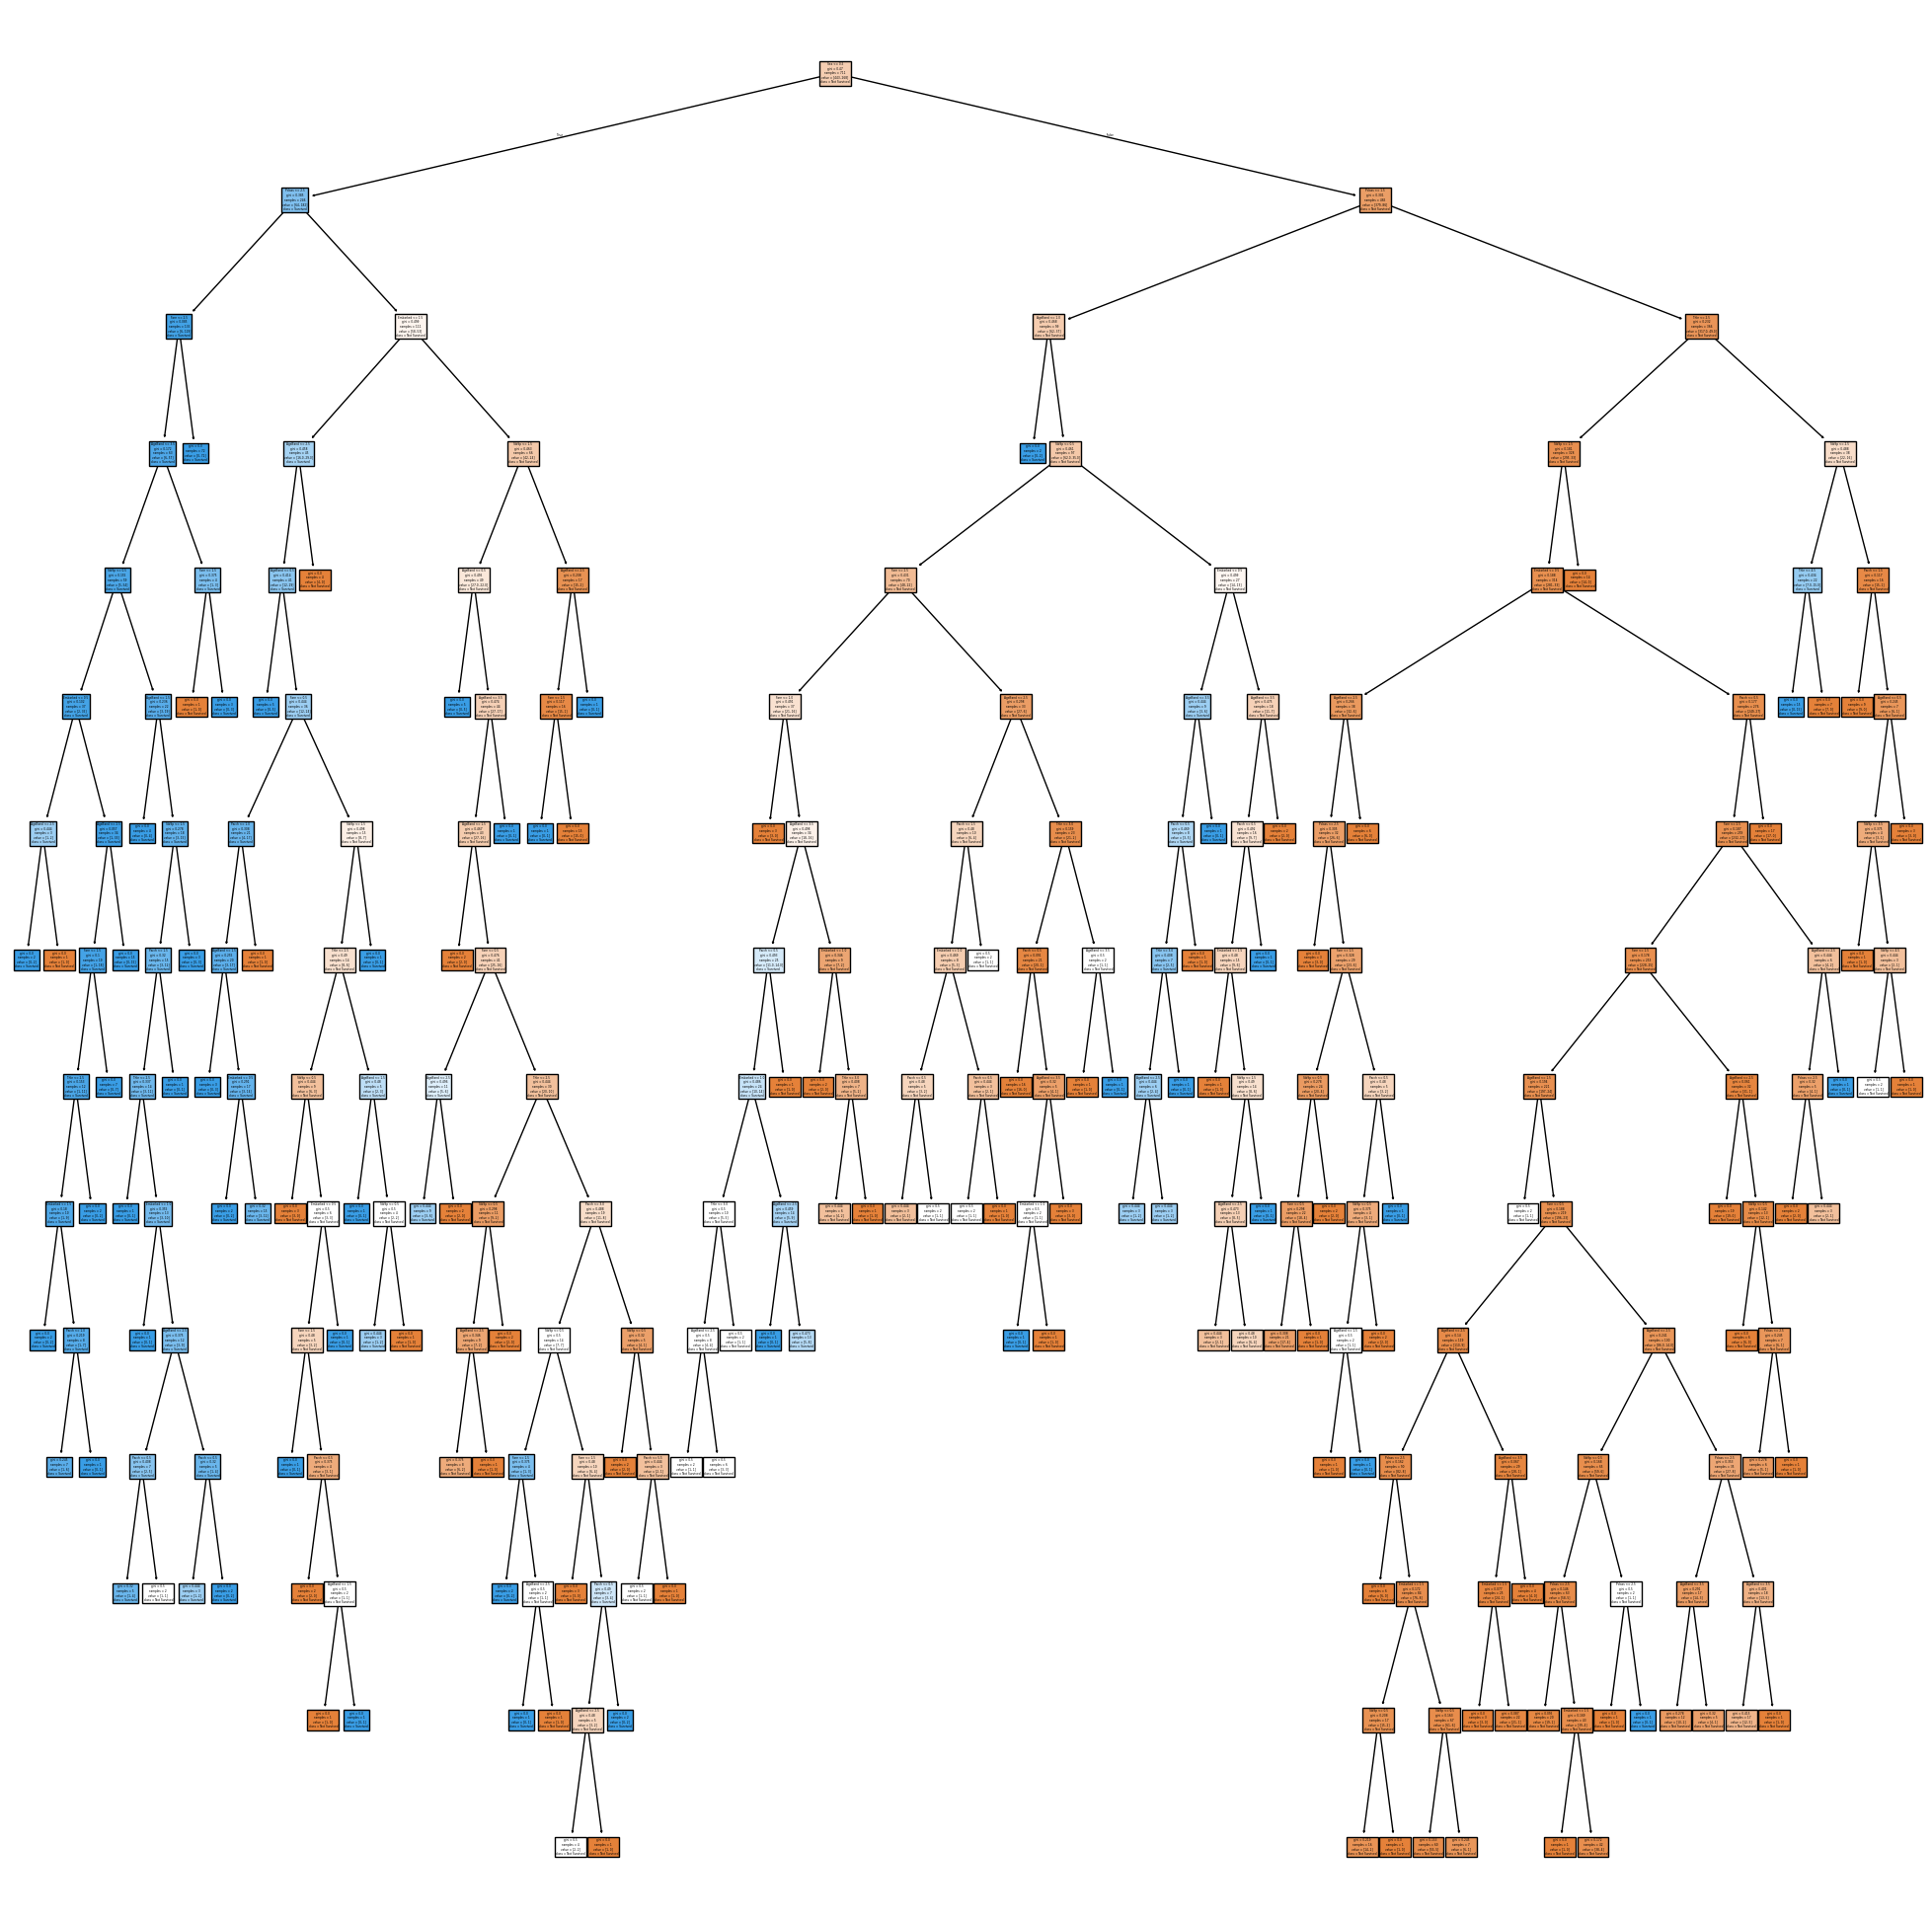

In [ ]:
# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_accuracy, dt_recall, dt_auc = evaluate_model(dt_classifier, X_train, X_test, y_train, y_test)
print("Decision Tree:")
print(f"Accuracy: {dt_accuracy}")
print(f"Recall: {dt_recall}")
print(f"AUC: {dt_auc}")
print("-"*100)
print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
print("Train Confusion Matrix:")
print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
print("-"*50)
print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, dt_classifier.predict(X_test)))
print("-"*100)
print("DECISION TREE WITHOUT PARAMETER TUNING")
# Plot the decision tree
plt.figure(figsize=(25, 25))
plot_tree(dt_classifier, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

Decision Tree:
Accuracy: 0.797752808988764
Recall: 0.6944444444444444
AUC: 0.7830843815513627
----------------------------------------------------------------------------------------------------
Train Accuracy : 0.9029535864978903
Train Confusion Matrix:
[[426  17]
 [ 52 216]]
--------------------------------------------------
Test Accuracy : 0.797752808988764
Test Confusion Matrix:
[[92 14]
 [22 50]]
----------------------------------------------------------------------------------------------------
DECISION TREE WITH IMPURITY CRITERION TUNING


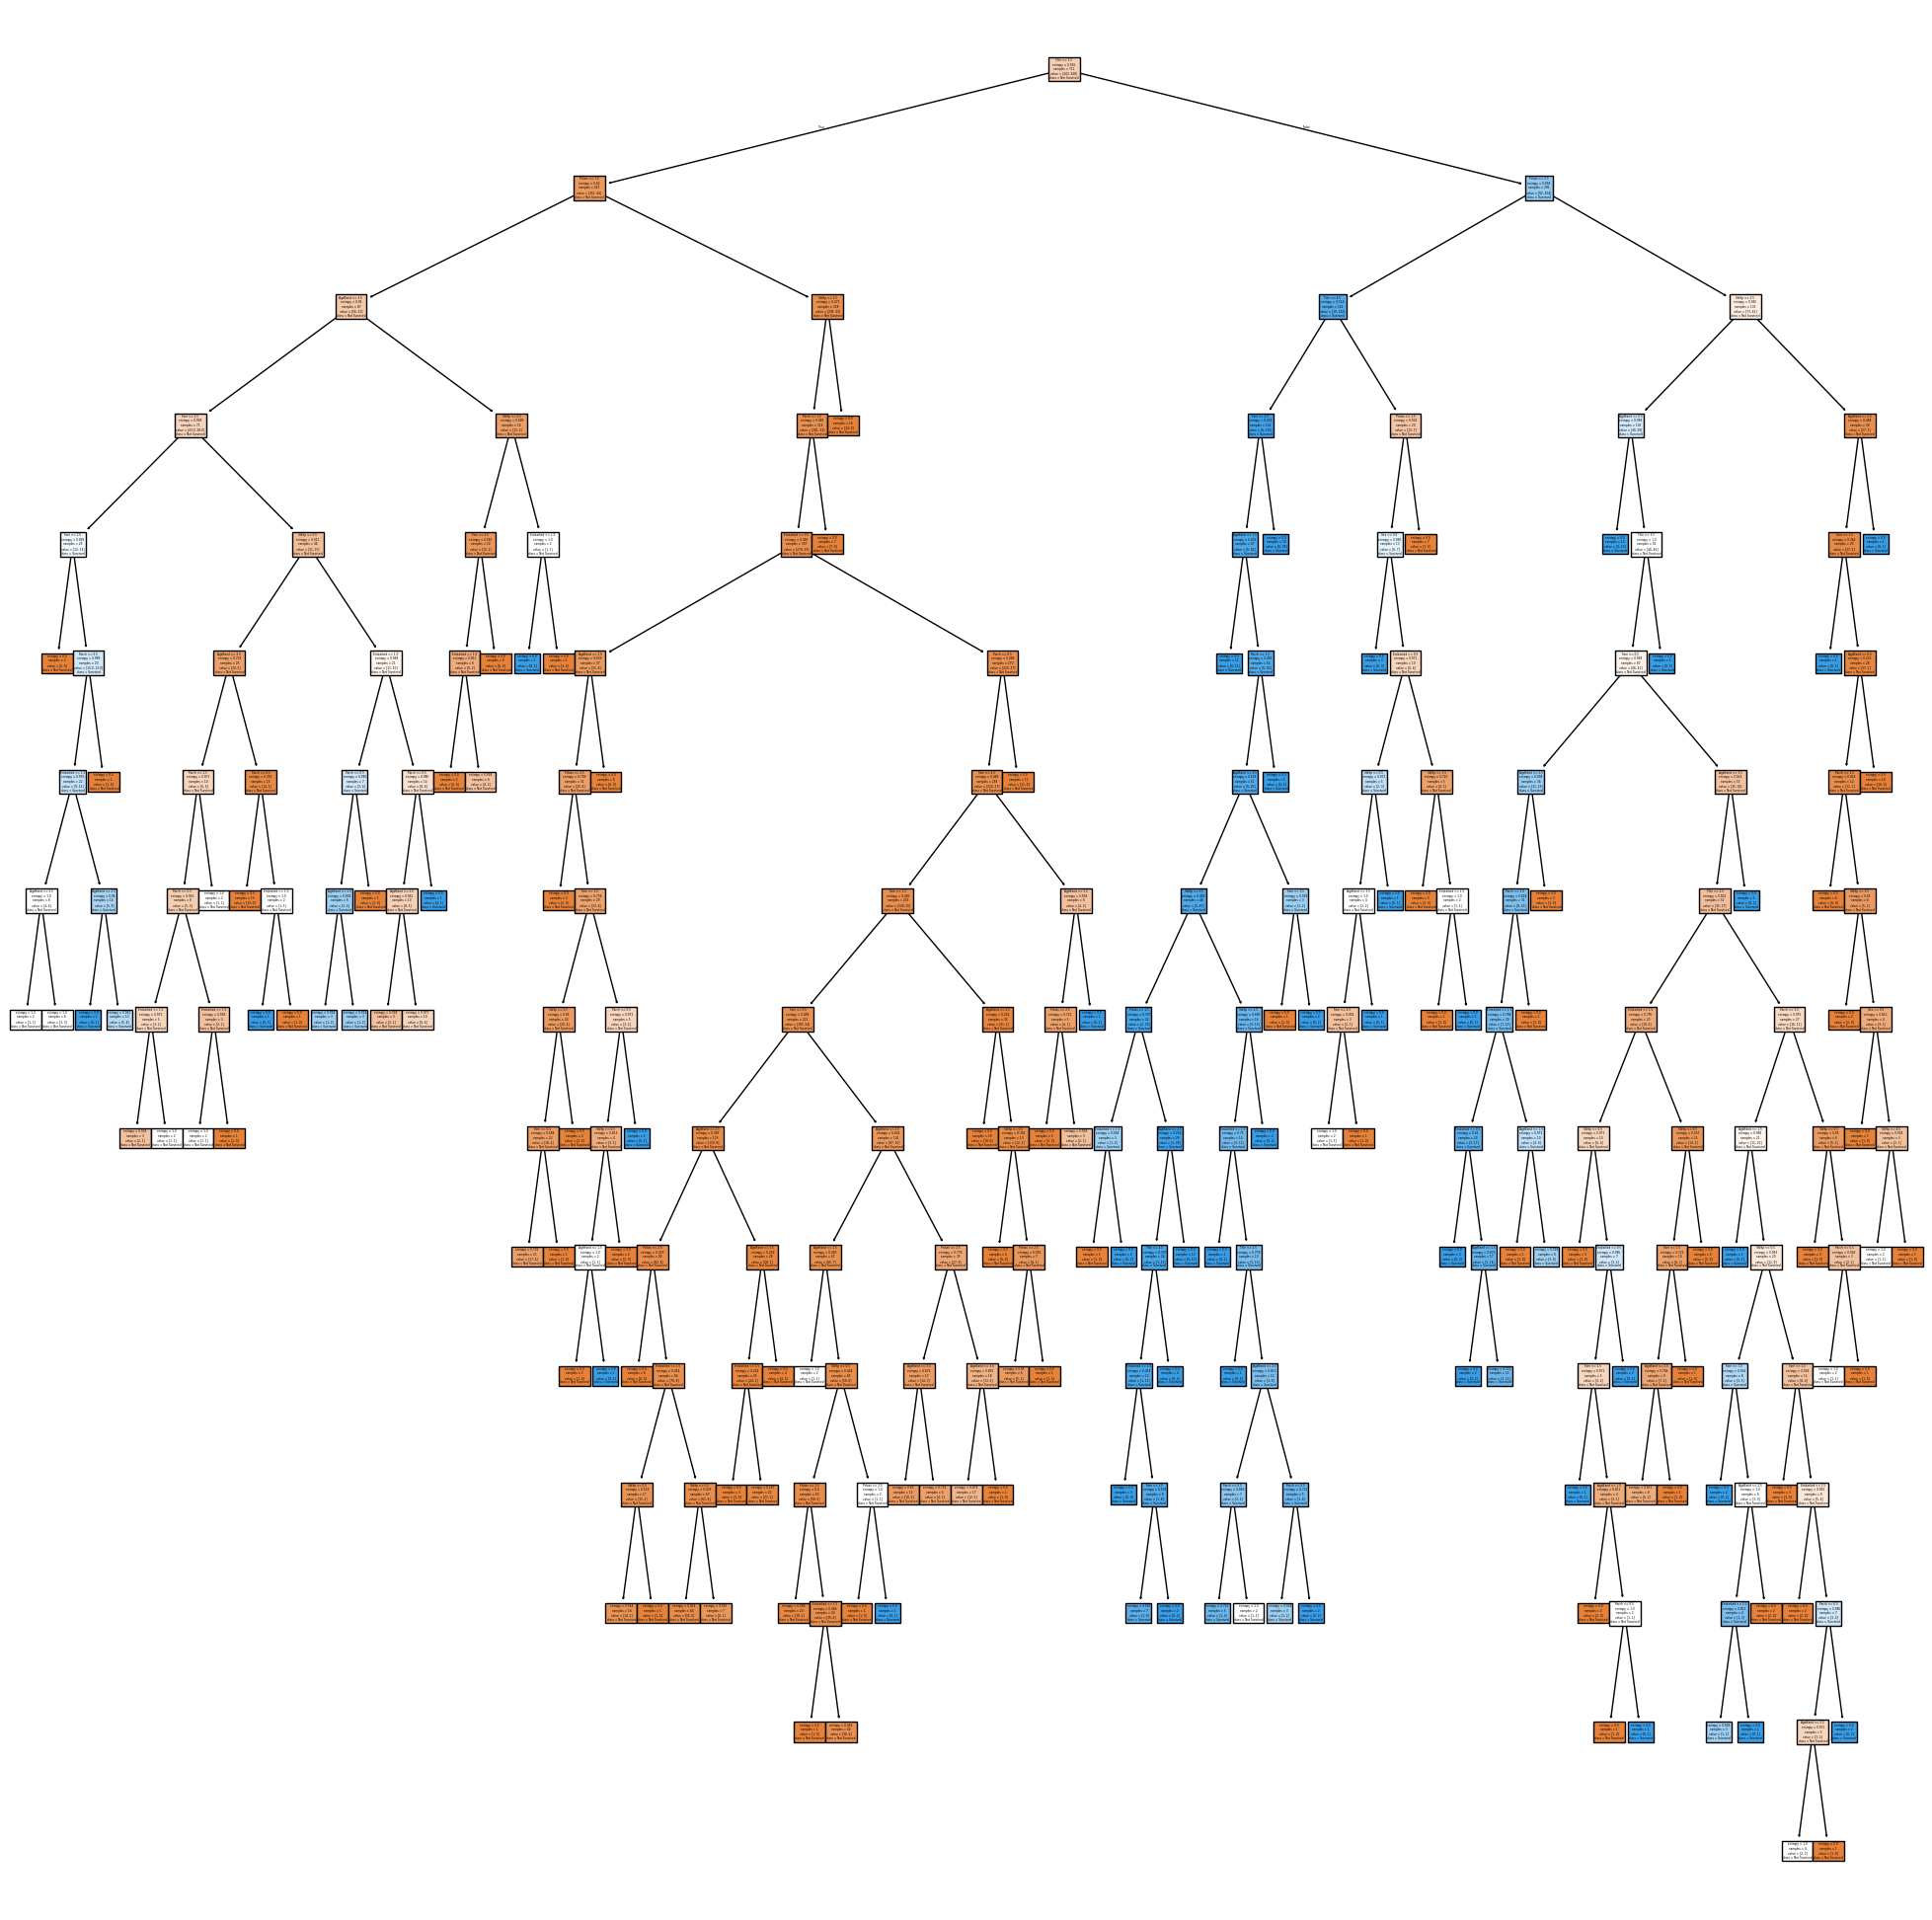

In [ ]:
# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier(
    criterion='entropy',  # Default = gini (above)
    random_state=42)

# Train the model
dt_accuracy, dt_recall, dt_auc = evaluate_model(dt_classifier, X_train, X_test, y_train, y_test)
print("Decision Tree:")
print(f"Accuracy: {dt_accuracy}")
print(f"Recall: {dt_recall}")
print(f"AUC: {dt_auc}")
print("-"*100)
print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
print("Train Confusion Matrix:")
print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
print("-"*50)
print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, dt_classifier.predict(X_test)))
print("-"*100)
print("DECISION TREE WITH IMPURITY CRITERION TUNING")
# Plot the decision tree
plt.figure(figsize=(25, 25))
plot_tree(dt_classifier, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

Both Gini and Entropy give similar results

Decision Tree:
Accuracy: 0.7752808988764045
Recall: 0.6666666666666666
AUC: 0.7725366876310273
----------------------------------------------------------------------------------------------------
Train Accuracy : 0.9029535864978903
Train Confusion Matrix:
[[426  17]
 [ 52 216]]
--------------------------------------------------
Test Accuracy : 0.7752808988764045
Test Confusion Matrix:
[[90 16]
 [24 48]]
----------------------------------------------------------------------------------------------------
DECISION TREE WITH IMPURITY CRITERION AND SPLITTER TUNING


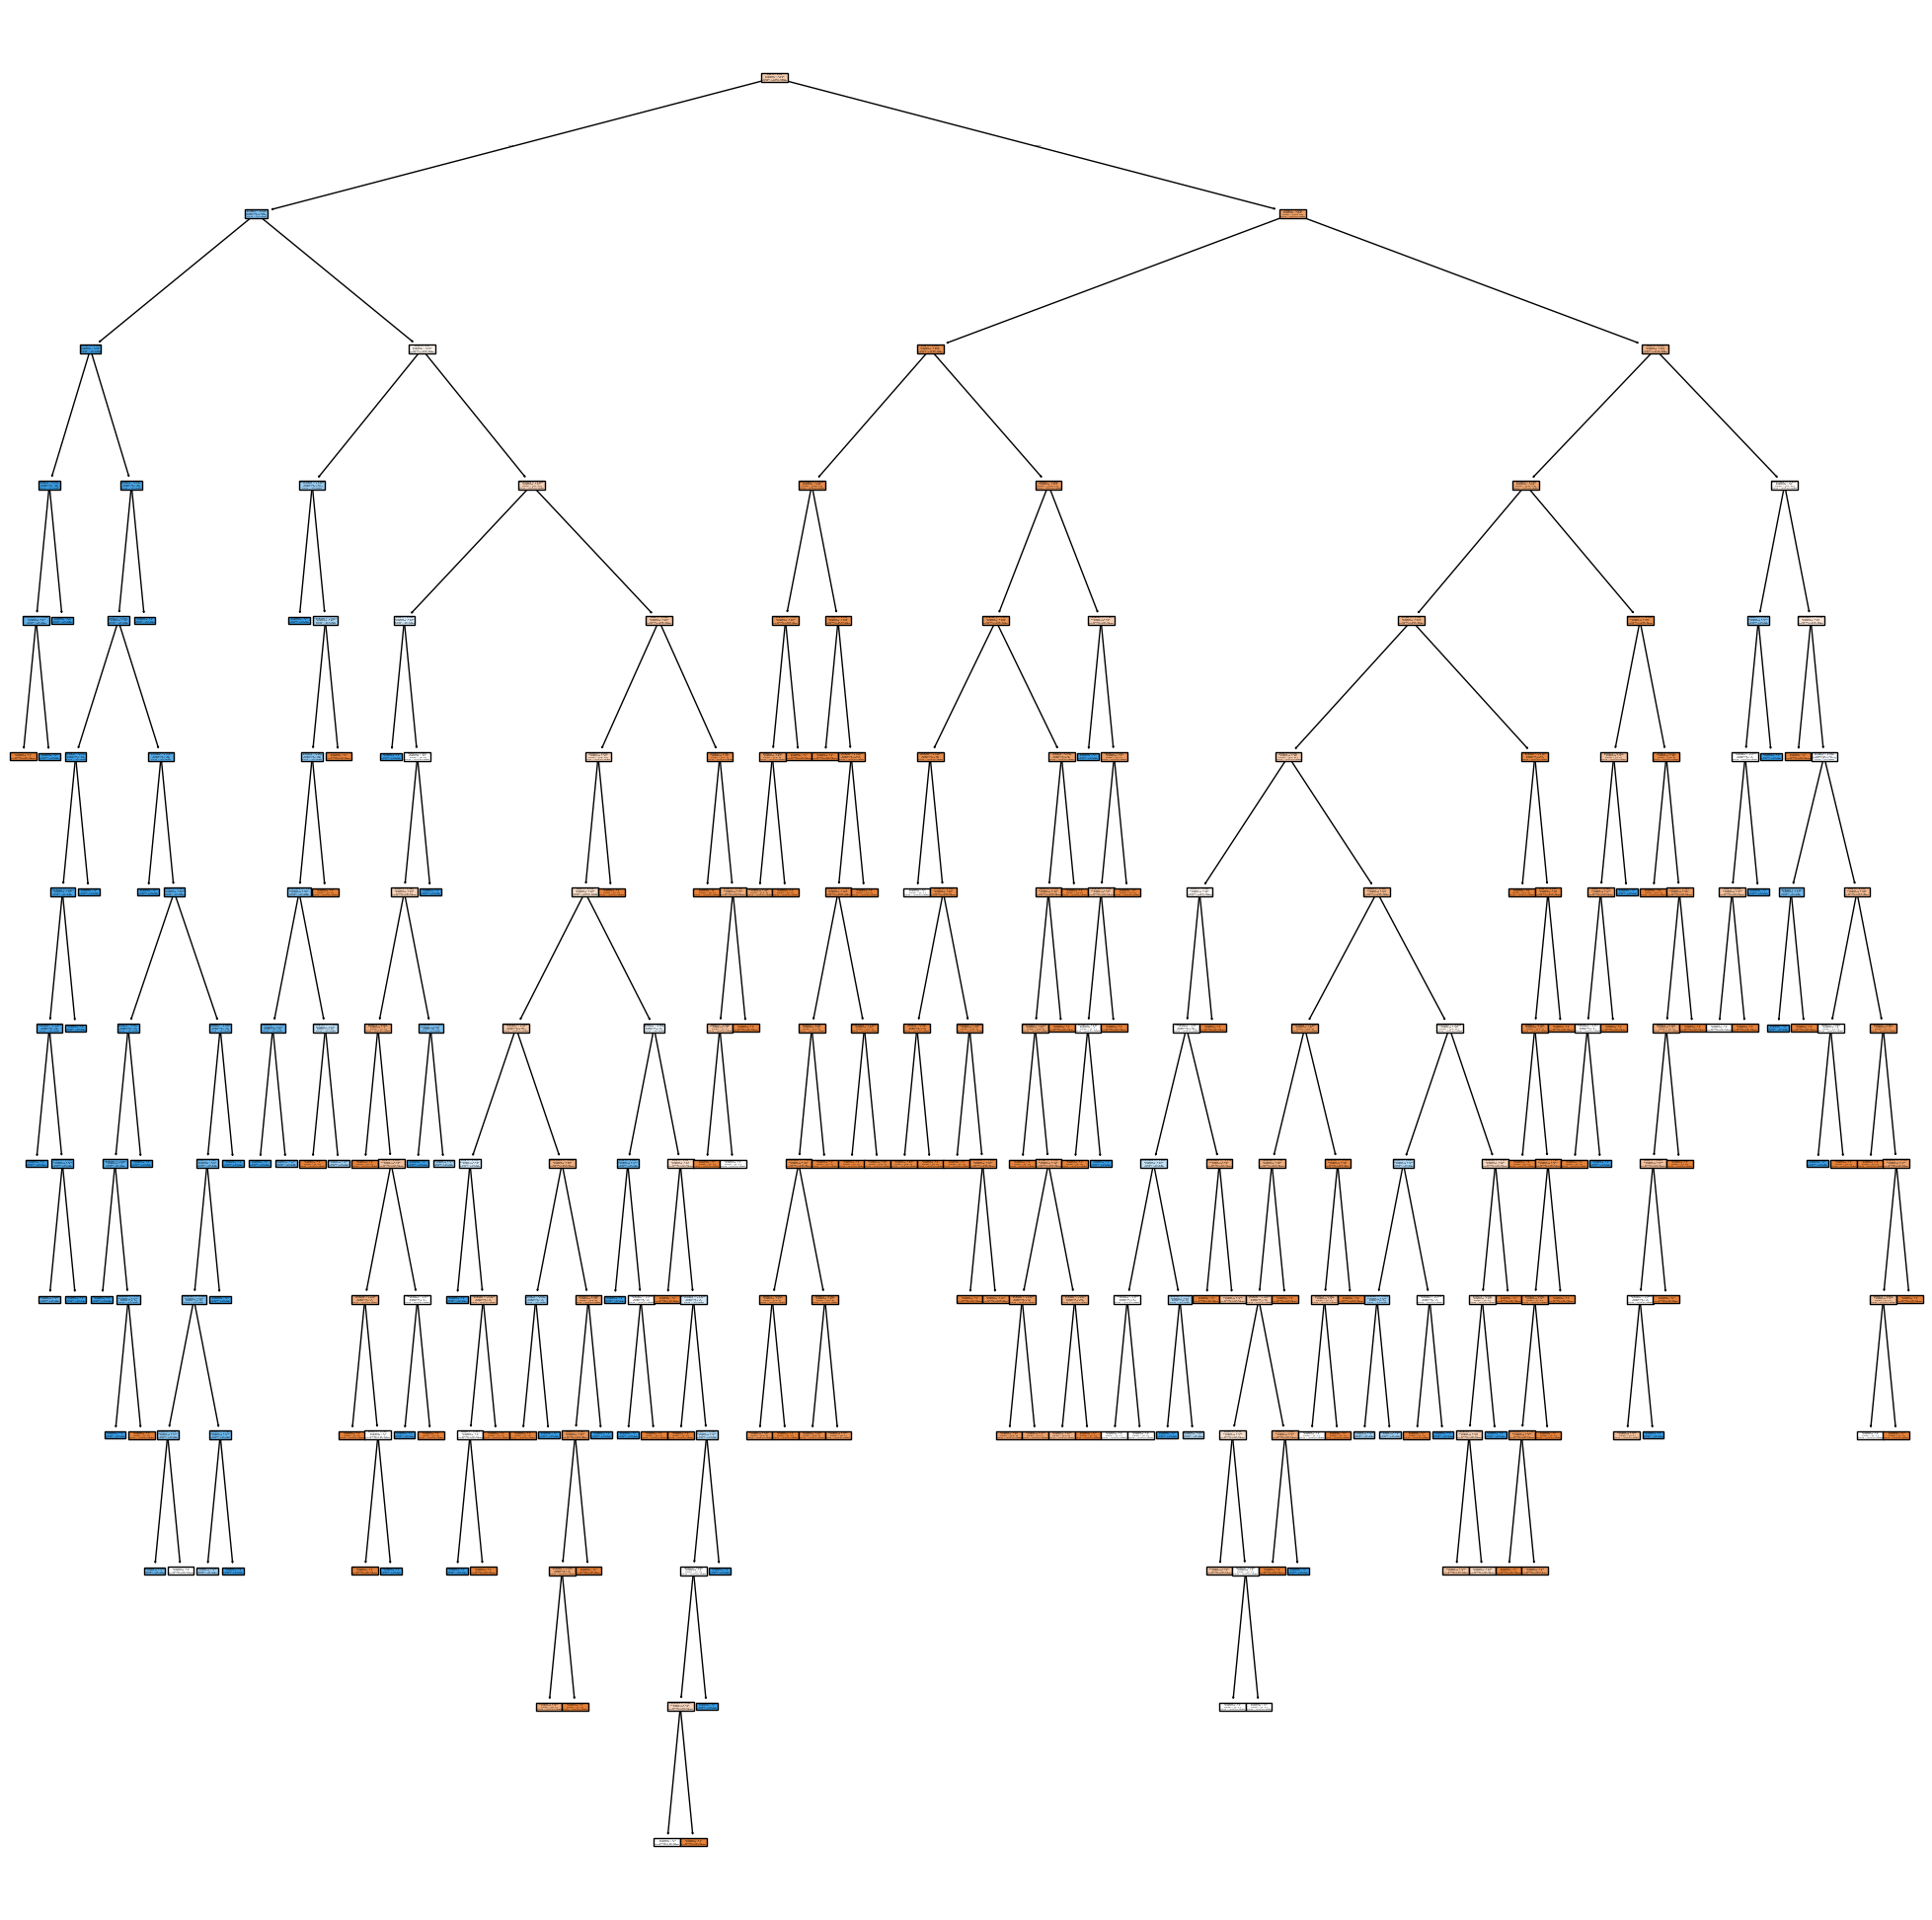

In [ ]:
# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier(
    criterion='entropy',
    splitter='random',  # Default = 'best'
    random_state=42)

# Train the model
dt_accuracy, dt_recall, dt_auc = evaluate_model(dt_classifier, X_train, X_test, y_train, y_test)
print("Decision Tree:")
print(f"Accuracy: {dt_accuracy}")
print(f"Recall: {dt_recall}")
print(f"AUC: {dt_auc}")
print("-"*100)
print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
print("Train Confusion Matrix:")
print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
print("-"*50)
print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, dt_classifier.predict(X_test)))
print("-"*100)
print("DECISION TREE WITH IMPURITY CRITERION AND SPLITTER TUNING")
# Plot the decision tree
plt.figure(figsize=(25, 25))
plot_tree(dt_classifier, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

Splitter - Random performs slightly better than best

Decision Tree:
Accuracy: 0.7921348314606742
Recall: 0.5972222222222222
AUC: 0.8101415094339623
----------------------------------------------------------------------------------------------------
Train Accuracy : 0.8368495077355836
Train Confusion Matrix:
[[425  18]
 [ 98 170]]
--------------------------------------------------
Test Accuracy : 0.7921348314606742
Test Confusion Matrix:
[[98  8]
 [29 43]]
----------------------------------------------------------------------------------------------------
DECISION TREE WITH IMPURITY CRITERION, SPLITTER AND MAX_DEPTH TUNING


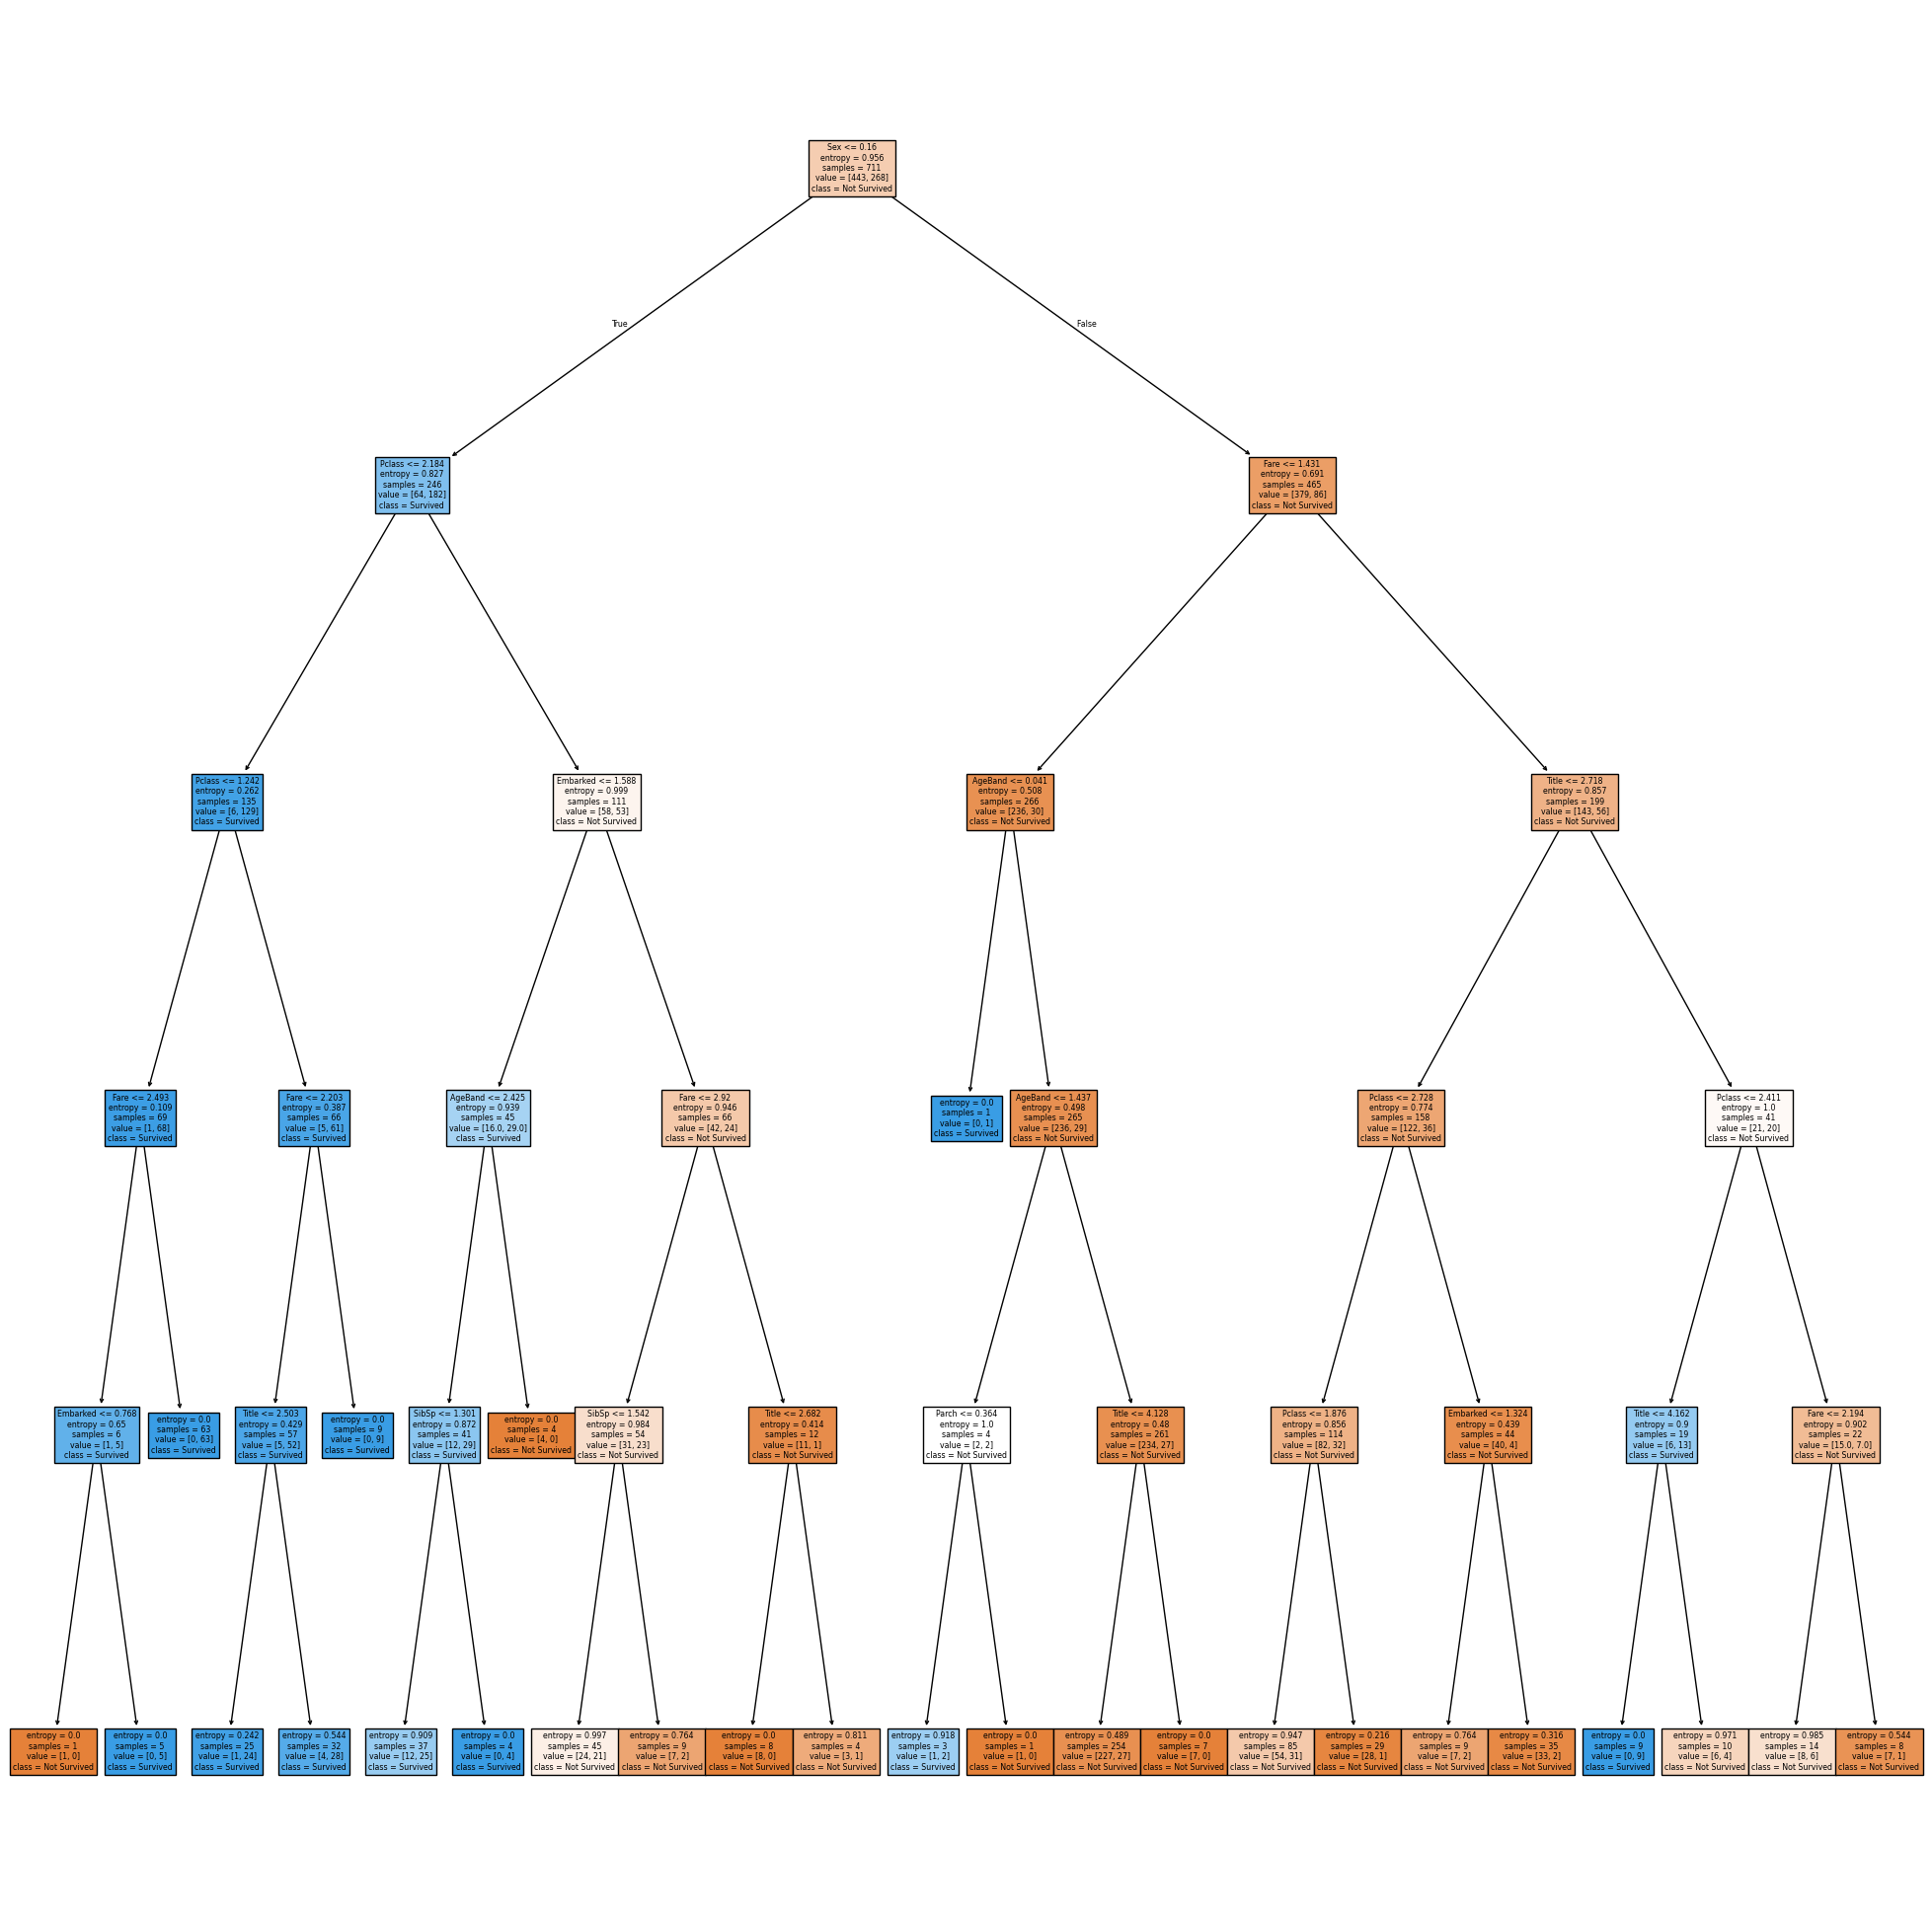

In [ ]:
# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier(
    criterion='entropy',
    splitter='random',
    max_depth=5,
    random_state=42)

# Train the model
dt_accuracy, dt_recall, dt_auc = evaluate_model(dt_classifier, X_train, X_test, y_train, y_test)
print("Decision Tree:")
print(f"Accuracy: {dt_accuracy}")
print(f"Recall: {dt_recall}")
print(f"AUC: {dt_auc}")
print("-"*100)
print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
print("Train Confusion Matrix:")
print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
print("-"*50)
print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, dt_classifier.predict(X_test)))
print("-"*100)
print("DECISION TREE WITH IMPURITY CRITERION, SPLITTER AND MAX_DEPTH TUNING")
# Plot the decision tree
plt.figure(figsize=(25, 25))
plot_tree(dt_classifier, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

Decision Tree:
Accuracy: 0.7921348314606742
Recall: 0.5416666666666666
AUC: 0.8468946540880504
----------------------------------------------------------------------------------------------------
Train Accuracy : 0.8270042194092827
Train Confusion Matrix:
[[431  12]
 [111 157]]
--------------------------------------------------
Test Accuracy : 0.7921348314606742
Test Confusion Matrix:
[[102   4]
 [ 33  39]]
----------------------------------------------------------------------------------------------------
DECISION TREE WITH IMPURITY CRITERION, SPLITTER, MAX_DEPTH AND MIN_SAMPLES_SPLIT TUNING


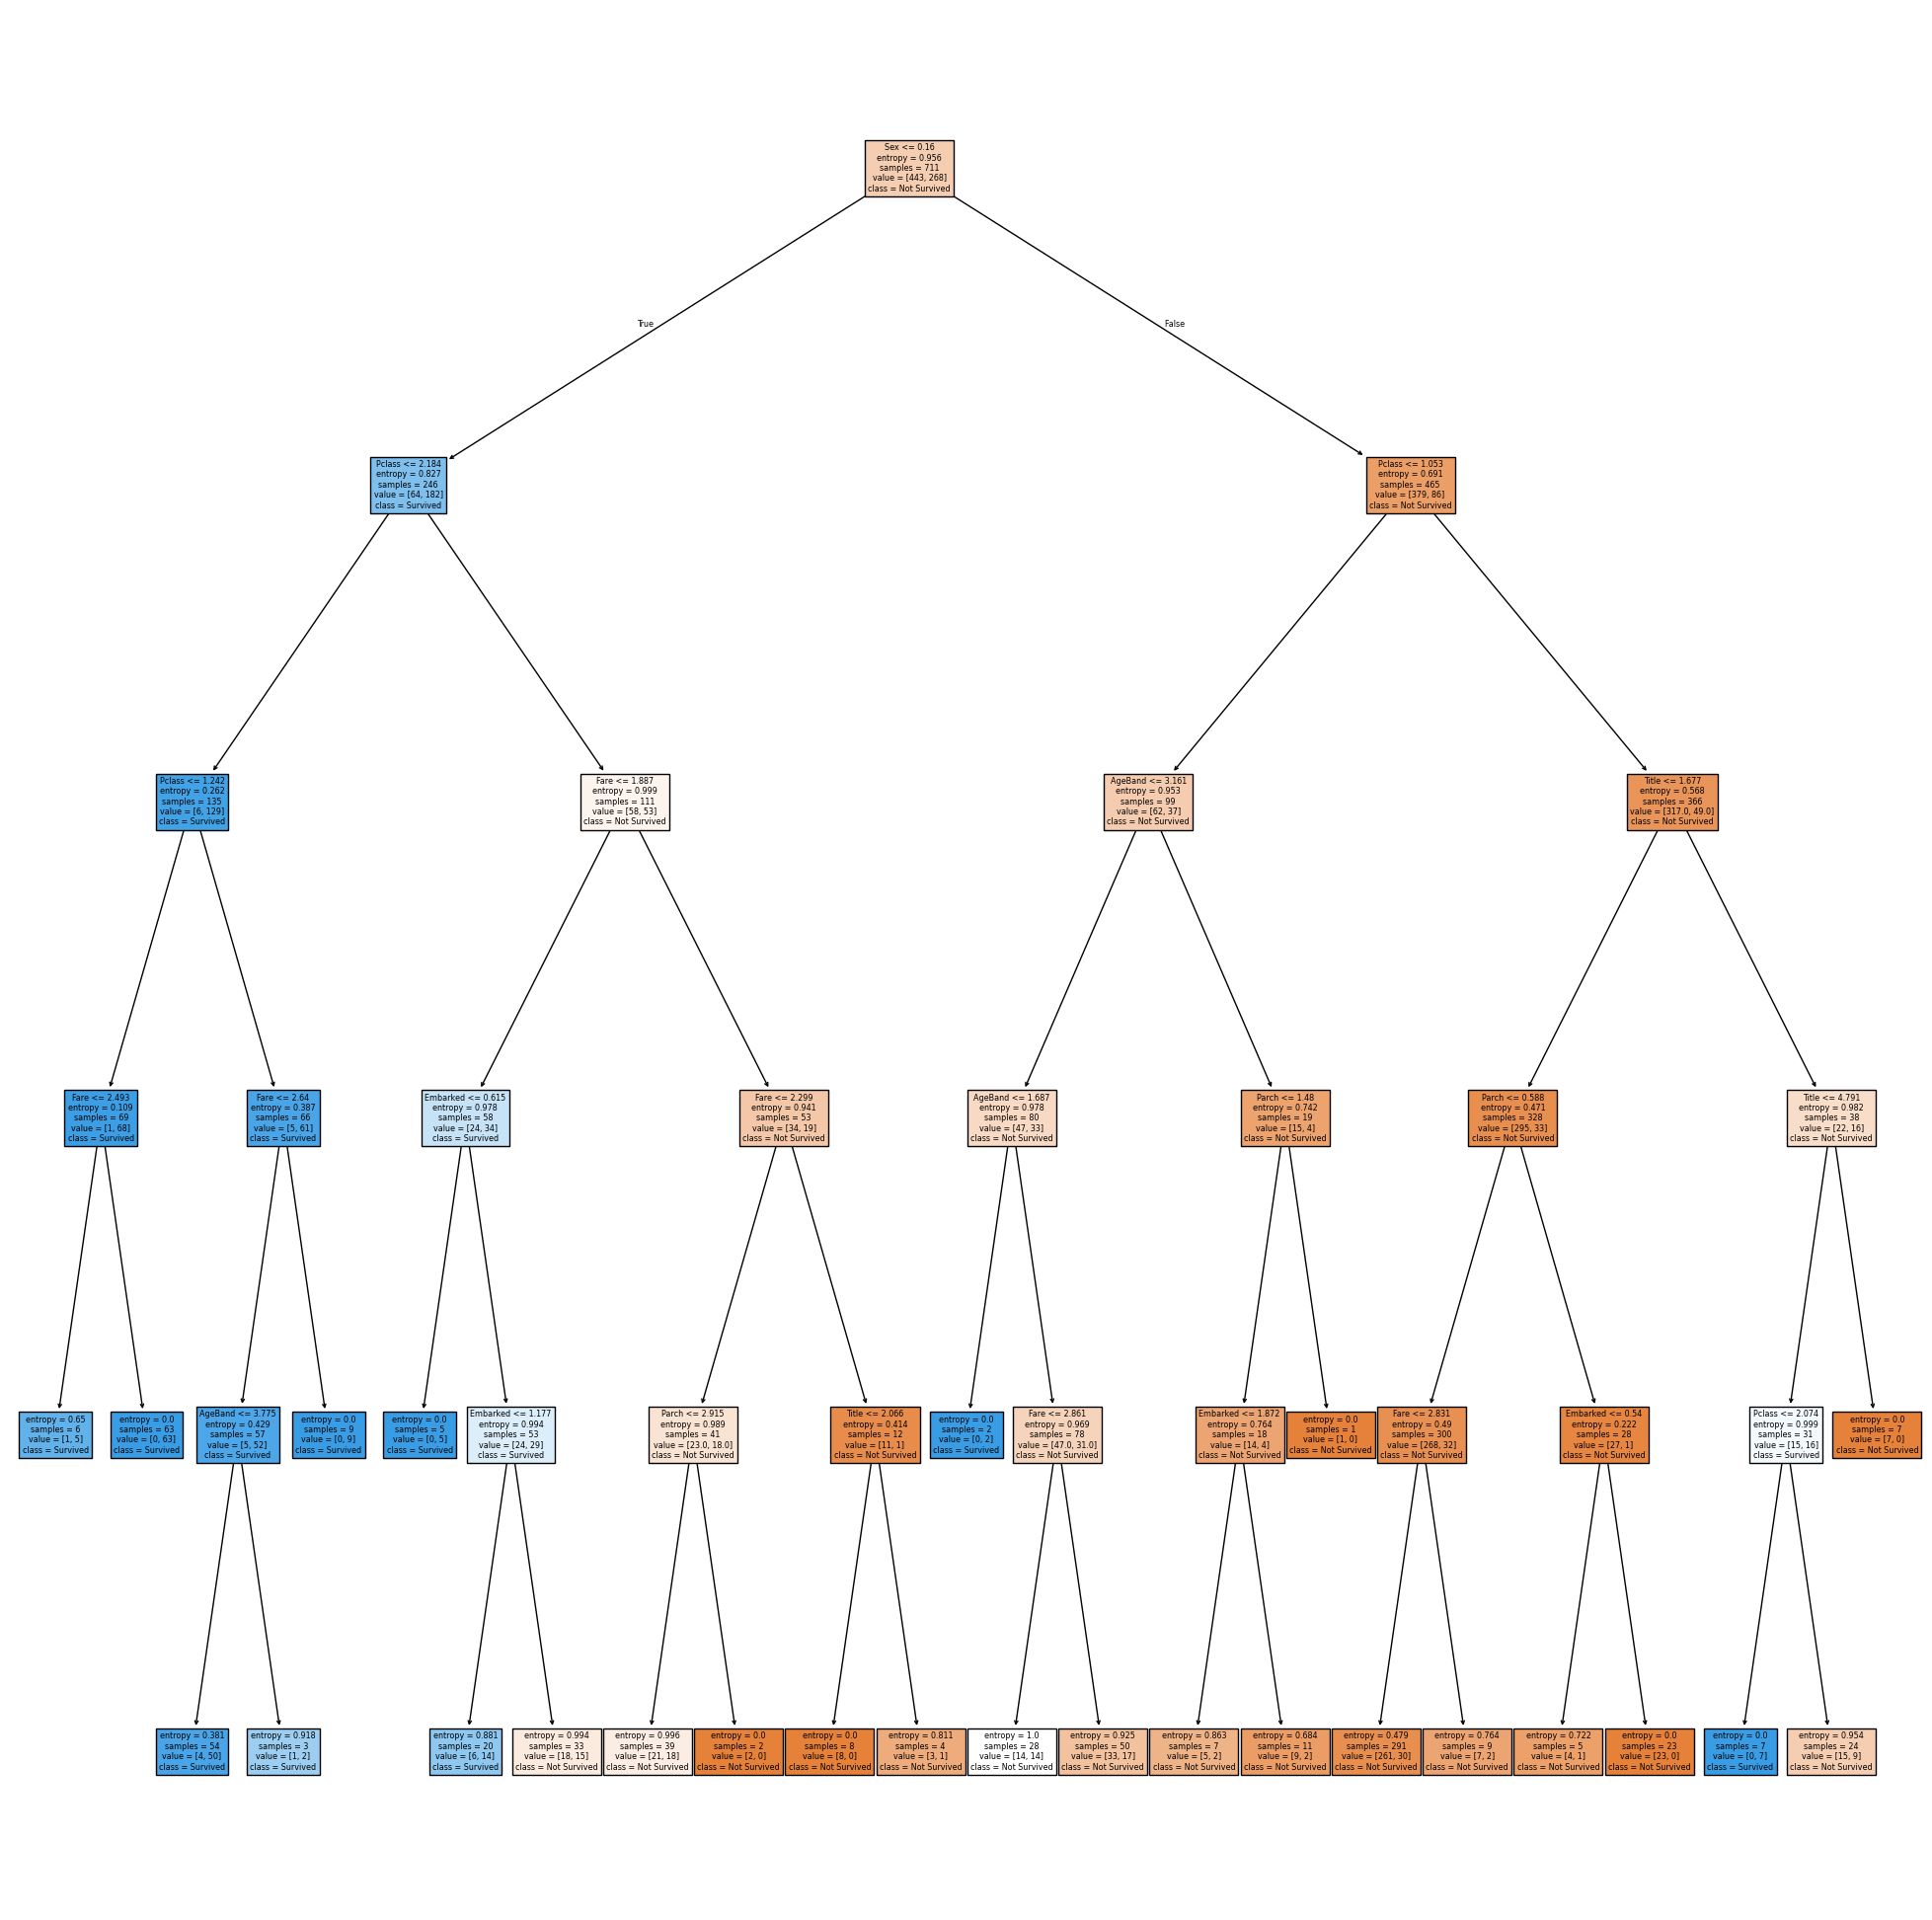

In [ ]:
# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier(
    criterion='entropy',
    splitter='random',
    max_depth=5,
    min_samples_split=10,
    random_state=42)

# Train the model
dt_accuracy, dt_recall, dt_auc = evaluate_model(dt_classifier, X_train, X_test, y_train, y_test)
print("Decision Tree:")
print(f"Accuracy: {dt_accuracy}")
print(f"Recall: {dt_recall}")
print(f"AUC: {dt_auc}")
print("-"*100)
print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
print("Train Confusion Matrix:")
print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
print("-"*50)
print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, dt_classifier.predict(X_test)))
print("-"*100)
print("DECISION TREE WITH IMPURITY CRITERION, SPLITTER, MAX_DEPTH AND MIN_SAMPLES_SPLIT TUNING")
# Plot the decision tree
plt.figure(figsize=(25, 25))
plot_tree(dt_classifier, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

In [ ]:
# setup parameter space to run a GridSearch Algorithm
parameters = {'criterion':['gini','entropy'],
              'splitter':['best','random'],
              'max_depth':np.arange(1,21).tolist(),
              'min_samples_split':np.arange(2,11).tolist(),
              'min_samples_leaf':np.arange(1,11).tolist(),
              'max_features':['sqrt','log2'],
              'max_leaf_nodes':np.arange(3,26).tolist()}

# create an instance of the grid search object
g1 = GridSearchCV(DecisionTreeClassifier(), parameters)

# conduct grid search over the parameter space
start_time = time.time()
g1.fit(X_train,y_train)
duration = time.time() - start_time
print("Time taken for Grid Search:", duration)

# show best parameter configuration found for classifier
cls_params1 = g1.best_params_
cls_params1

Time taken for Grid Search: 9329.121526956558


{'criterion': 'entropy',
 'max_depth': 16,
 'max_features': 'log2',
 'max_leaf_nodes': 15,
 'min_samples_leaf': 7,
 'min_samples_split': 7,
 'splitter': 'best'}

Decision Tree:
Accuracy: 0.8146067415730337
Recall: 0.7222222222222222
AUC: 0.8170204402515724
----------------------------------------------------------------------------------------------------
Train Accuracy : 0.8326300984528833
Train Confusion Matrix:
[[398  45]
 [ 74 194]]
--------------------------------------------------
Test Accuracy : 0.8146067415730337
Test Confusion Matrix:
[[93 13]
 [20 52]]
----------------------------------------------------------------------------------------------------
DECISION TREE WITH HYPER-PARAMETER TUNING USING GRIDSEARCH


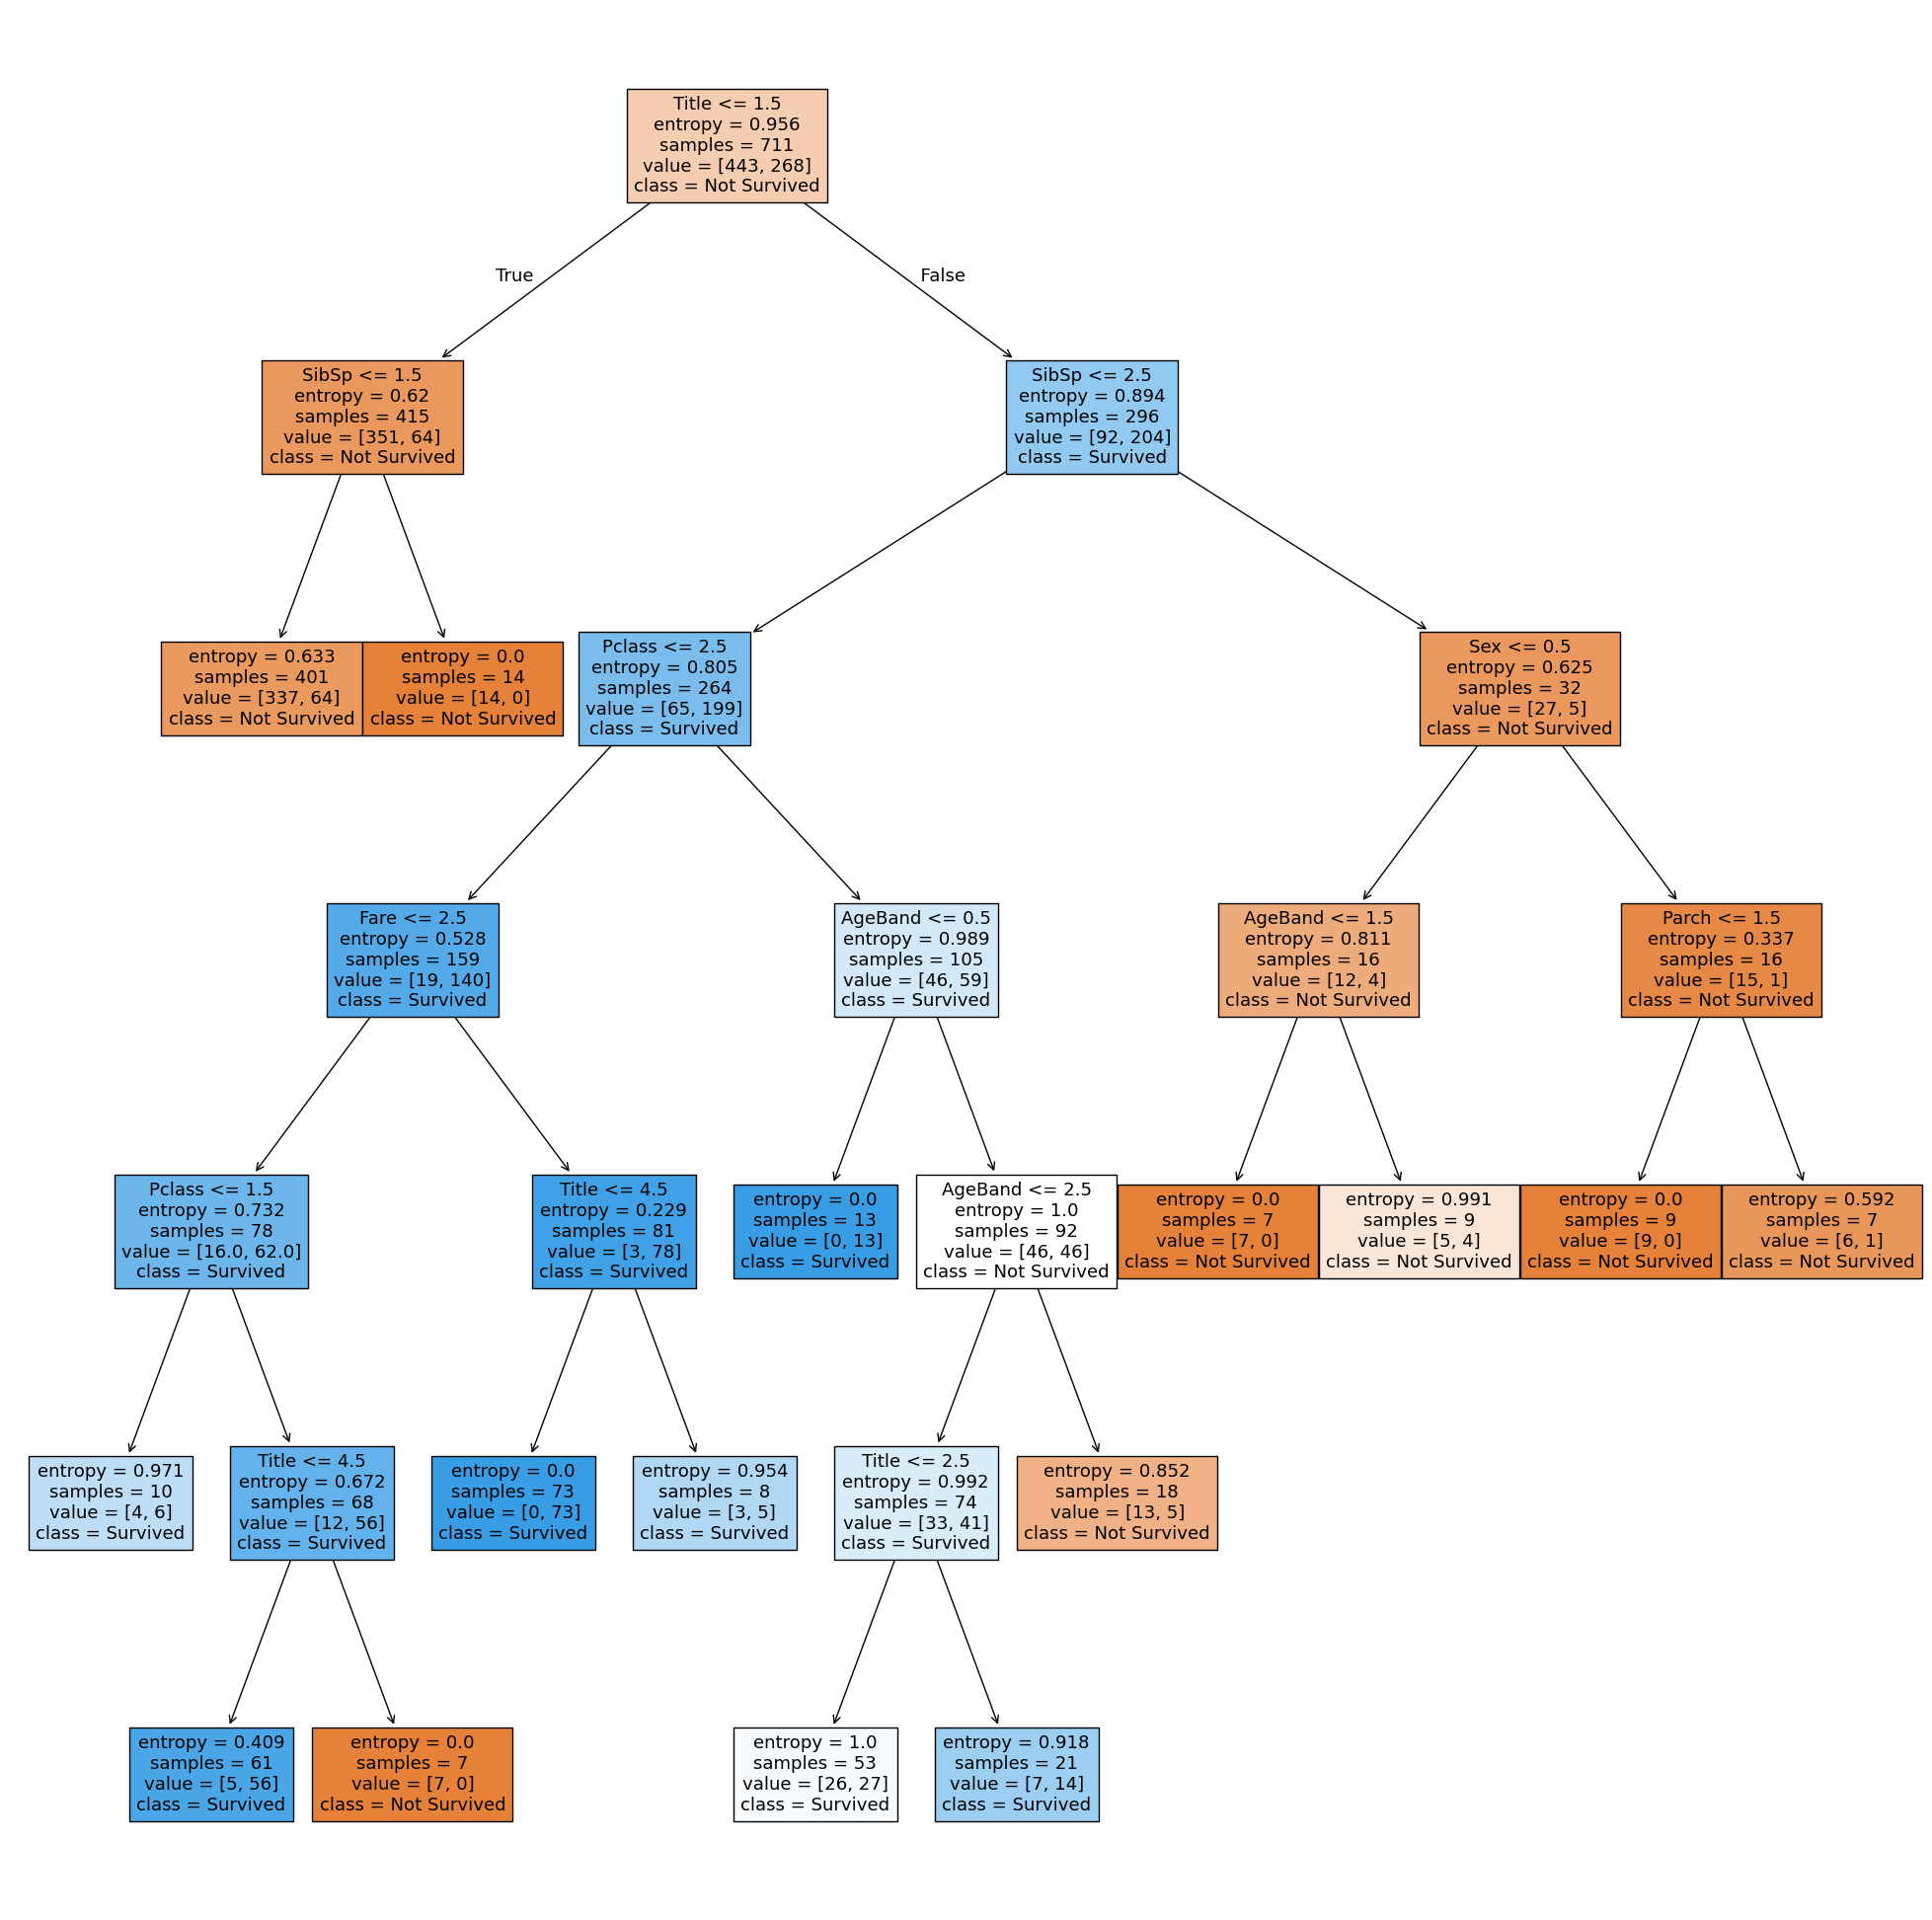

In [ ]:
# Create a decision tree classifier with output parameters from GridSearch
gs_dt_classifier = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=16,
    max_features='log2',
    max_leaf_nodes=15,
    min_samples_leaf=7,
    min_samples_split=7,
    splitter= 'best')

# Train the model
dt_accuracy, dt_recall, dt_auc = evaluate_model(dt_classifier, X_train, X_test, y_train, y_test)
print("Decision Tree:")
print(f"Accuracy: {dt_accuracy}")
print(f"Recall: {dt_recall}")
print(f"AUC: {dt_auc}")
print("-"*100)
print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
print("Train Confusion Matrix:")
print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
print("-"*50)
print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, dt_classifier.predict(X_test)))
print("-"*100)
print("DECISION TREE WITH HYPER-PARAMETER TUNING USING GRIDSEARCH")
# Plot the decision tree
plt.figure(figsize=(25, 25))
plot_tree(dt_classifier, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

In [ ]:
# setup parameter space for RandomizedSearch
parameters = {'criterion':['gini','entropy'],
              'splitter':['best','random'],
              'max_depth':np.arange(1,21).tolist()[0::2],
              'min_samples_split':np.arange(2,11).tolist()[0::2],
              'min_samples_leaf':np.arange(1,11).tolist()[0::2],
              'max_features':['sqrt','log2'],
              'max_leaf_nodes':np.arange(3,26).tolist()[0::2]}

# create an instance of the grid search object
g1 = RandomizedSearchCV(DecisionTreeClassifier(), parameters)

# conduct grid search over the parameter space
start_time = time.time()
g1.fit(X_train,y_train)
duration = time.time() - start_time
print("Time taken for Grid Search:", duration)

# show best parameter configuration found for classifier
cls_params1 = g1.best_params_
cls_params1

Time taken for Grid Search: 0.4066755771636963


{'splitter': 'best',
 'min_samples_split': 10,
 'min_samples_leaf': 3,
 'max_leaf_nodes': 21,
 'max_features': 'log2',
 'max_depth': 11,
 'criterion': 'gini'}

Decision Tree:
Accuracy: 0.8146067415730337
Recall: 0.6666666666666666
AUC: 0.8449947589098533
----------------------------------------------------------------------------------------------------
Train Accuracy : 0.8438818565400844
Train Confusion Matrix:
[[409  34]
 [ 77 191]]
--------------------------------------------------
Test Accuracy : 0.8146067415730337
Test Confusion Matrix:
[[97  9]
 [24 48]]
----------------------------------------------------------------------------------------------------
DECISION TREE WITH HYPER-PARAMETER TUNING USING GRIDSEARCH


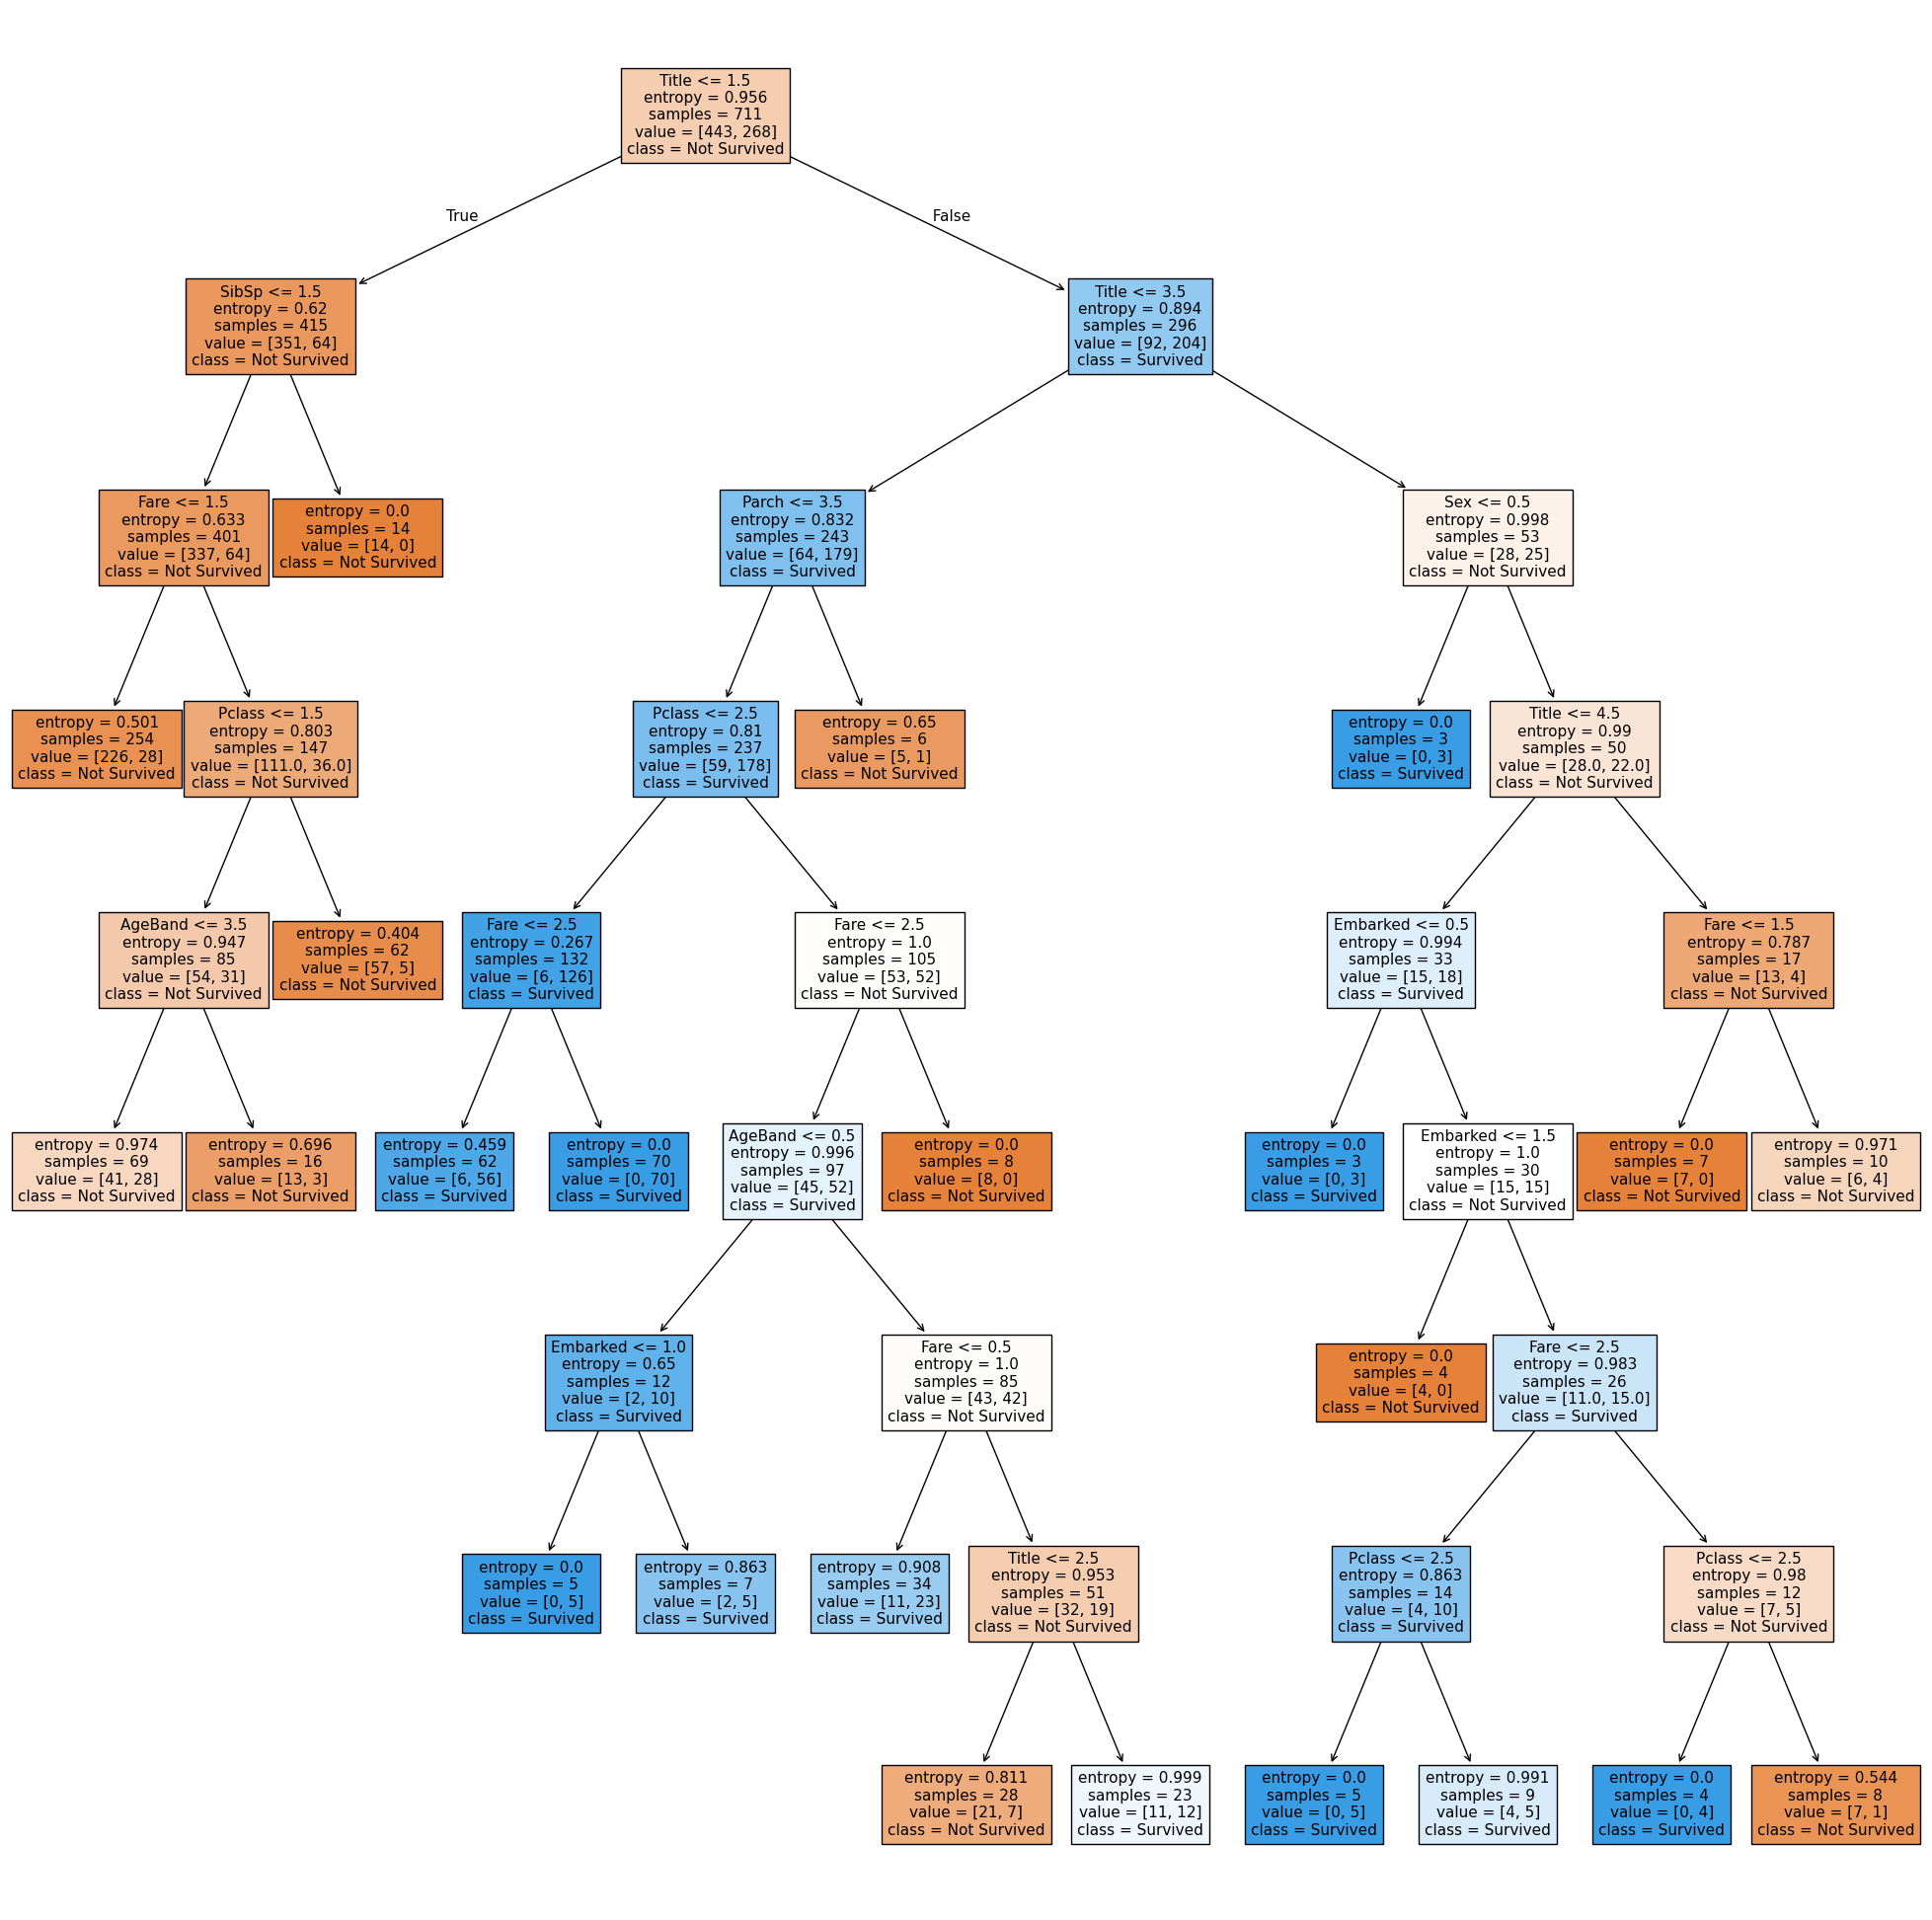

In [ ]:
# Create a decision tree classifier from the output parameters from RandomizedSearch
dt_classifier = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=9,
    max_features='log2',
    max_leaf_nodes=23,
    min_samples_leaf=3,
    min_samples_split=4,
    splitter= 'best')

# Train the model
dt_accuracy, dt_recall, dt_auc = evaluate_model(dt_classifier, X_train, X_test, y_train, y_test)
print("Decision Tree:")
print(f"Accuracy: {dt_accuracy}")
print(f"Recall: {dt_recall}")
print(f"AUC: {dt_auc}")
print("-"*100)
print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
print("Train Confusion Matrix:")
print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
print("-"*50)
print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, dt_classifier.predict(X_test)))
print("-"*100)
print("DECISION TREE WITH HYPER-PARAMETER TUNING USING GRIDSEARCH")
# Plot the decision tree
plt.figure(figsize=(25, 25))
plot_tree(dt_classifier, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

Task 1 - Part 3

**Apply the five-fold cross validation of your fine-tuned decision tree learning
model to the Titanic training data to extract average classification accuracy**

In [ ]:
# perform 5-fold cross validation of the fine-tuned DT based on GridSearch best parameters
scores = cross_val_score(gs_dt_classifier, X_train, y_train, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.8041958  0.82394366 0.82394366 0.80985915 0.83802817]
Accuracy: 0.82 (+/- 0.02)


Task 1 - Part 4

**Apply the five-fold cross validation of your fine-tuned random forest learning
model to the Titanic training data to extract average classification accuracy**

In [46]:
"""
Valid parameters are: ['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', \
                       'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', \
                       'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', \
                       'min_weight_fraction_leaf', 'monotonic_cst', 'n_estimators', \
                       'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start']
"""

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion':['gini','entropy'],
    'max_depth':[None, 10, 20],
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf':[1, 2, 4],
    'max_features':['sqrt','log2'],
    'max_leaf_nodes':[1, 2, 5],
    'bootstrap':[True, False],
    'max_samples':[0.5, 0.75],
    'random_state': [42]
}

gs_rf = GridSearchCV(RandomForestClassifier(), rf_param_grid)

# conduct grid search over the parameter space
start_time = time.time()
gs_rf.fit(X_train,y_train)
duration = time.time() - start_time
print("Time taken for Grid Search:", duration)

# show best parameter configuration found for classifier
cls_params1 = gs_rf.best_params_
cls_params1

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
12960 fits failed out of a total of 19440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6480 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn

Time taken for Grid Search: 2275.9707477092743


{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'log2',
 'max_leaf_nodes': 5,
 'max_samples': 0.75,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 200,
 'random_state': 42}

In [47]:
rf_classifier = RandomForestClassifier(
    criterion='gini',
    max_depth=None,
    max_features='log2',
    max_leaf_nodes=5,
    max_samples=0.75,
    min_samples_leaf=2,
    min_samples_split=10,
    n_estimators=200,
    bootstrap=True,
    random_state=42)

#  Train the model
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8033707865168539

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       106
           1       0.78      0.71      0.74        72

    accuracy                           0.80       178
   macro avg       0.80      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178


Confusion Matrix:
 [[92 14]
 [21 51]]


In [48]:
# perform 5-fold cross validation of the fine-tuned DT based on GridSearch best parameters
scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.81818182 0.79577465 0.81690141 0.78169014 0.87323944]
Accuracy: 0.82 (+/- 0.06)


Task 1 - Part 5

**Which algorithm is better, Decision Tree or Random Forest? What are your
observations and conclusions from the algorithm comparison and analysis?**

*   For my particular scenario here, maybe because of the quality of training data or the parameters values tested in hyperparameter tuning, DT model and the RF model produced very similar results with an average accuracy after 5 fold cross validation equal to 0.82.

*   I would say that Random Forest algorithm is better because Random Forest eventually gave the best result after the 5th run of cross validation with an accuracy of 0.87. Whereas Decision Tree's best result after the 5th run of cross validation was an accuracy of almost 0.84.

*   Observations from algorithm comparison:

  1.   Average accuracy: Both DT and RF produced average accuracy of 0.82, both algorithms produced comparable performance overall.
  2.   Standard Deviation: DT had smaller standard deviation of +/- 0.02 than RF +/- 0.06, showing DT was more consistent across all the runs of cross validation. Higher standard deviation of RF maybe because of the randomness aspect of RFs
  3. Best Accuracy: RF gave the best accuracy 0.87 than DT (0.84)

*   Conclusion - RF is better because of higher best accuracy. Maybe with further tuning or additional cross validation RF would provide higher and more stable performance.